In [435]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import html5lib
from urllib.parse import urlparse

In [462]:
baseurl = "https://charterbank.huygens.knaw.nl/?mivast=3593&miadt=3593&mizig=314&miview=tbl&milang=nl&micols=1&mires=0&mibj=1594&miej=1595"


In [463]:
# buildup of a url see https://docs.python.org/3/library/urllib.parse.html#module-urllib.parse
parts = urlparse(baseurl)
parts

ParseResult(scheme='https', netloc='charterbank.huygens.knaw.nl', path='/', params='', query='mivast=3593&miadt=3593&mizig=314&miview=tbl&milang=nl&micols=1&mires=0&mibj=1594&miej=1595', fragment='')

In [464]:

queryparts = dict(parse.parse_qs(parts[4]))
queryparts

{'mivast': ['3593'],
 'miadt': ['3593'],
 'mizig': ['314'],
 'miview': ['tbl'],
 'milang': ['nl'],
 'micols': ['1'],
 'mires': ['0'],
 'mibj': ['1594'],
 'miej': ['1595']}

In [465]:
queryparts['mibj'] = 1025
queryparts['miej'] = 1026
queryparts

{'mivast': ['3593'],
 'miadt': ['3593'],
 'mizig': ['314'],
 'miview': ['tbl'],
 'milang': ['nl'],
 'micols': ['1'],
 'mires': ['0'],
 'mibj': 1025,
 'miej': 1026}

In [466]:
url = "https://charterbank.huygens.knaw.nl"

In [553]:
def clean(df):
    """clean empty values from dataframe"""
    xtdf = df.loc[~ndf.Titel.isna()]
    xtdf = xtdf.drop([column for column in xtdf.columns if 'Unnamed' in column], axis=1)
    return xtdf

In [554]:
def df_from_soup(soup):
    """make a dataframe from charter soup"""
    tables = soup.find_all(class_="mi_table_view")
    table = tables[0]
    df = pd.read_html(str(table))
    ndf = df[0]
    cdf = clean(ndf)
    return cdf

use requests library for querying see [https://3.python-requests.org/user/quickstart/#passing-parameters-in-urls]

```python
result = requests.get(url, params=queryparts)
```

and convert it into a manageable beautiful soup 

```python
soup = BeautifulSoup(result.text, 'html5lib')
```

In [578]:
res = {} # we make a list of dataframes first and concat afterwards
for item in range(925, 1850, 10):
    queryparts['mibj'] = item
    queryparts['miej'] = item+1    
    result = requests.get(url, params=queryparts)
    soup = BeautifulSoup(result.text, 'html5lib')
    df = df_from_soup(soup)
    try:
        res['%s' % item] = df
    except IndexError:
        pass
    


In [579]:
# check if we have at least 20 results from each year
for k in res.keys():
    if len(res[k]) < 20:
        print (k, len(res[k]))


1005 2
1015 3
1035 2
1045 8
1055 1
1065 2
1075 6
1095 7
1105 1
1115 3
1125 3
1135 9
1145 10
1155 9
1165 15
1175 9
1185 6
1195 11
1205 9
1215 11
1235 14


In [575]:
queryparts['mibj'] = 1076
queryparts['miej'] = 1076+1    
result = requests.get(url, params=queryparts)
soup = BeautifulSoup(result.text, 'html5lib')
df = df_from_soup(soup)

3

In [581]:
tdf = pd.concat(res.values(), ignore_index=True)


In [582]:
tdf.to_csv('dcn/charter_csvs/totaal_overzicht.csv', sep='\t')

In [885]:
tdf

,Titel,Datum
0,Stad Edam charters opgeborgen in de charterber...,0
1,Akte van overeenkomst tussen de erfgenamen van...,0
2,Registers en stukken betreffende leen-en lijfg...,0
3,"Adolph van Mervelt, heer zu Merfeldt, en zijn ...",0
4,Verslag van een door prof. Gerretson gehouden ...,0
5,"""Text of the Charter of the International Mili...",0
6,Oud nummer 3.01.27.01:: 5869. Verspreide Chart...,0
7,Oud nummer 3.01.27.01:: 5870. Verspreide Chart...,0
8,Oud nummer 3.01.27.01:: 5871. Verspreide Chart...,0
9,Oud nummer 3.01.27.01:: 5872. Verspreide Chart...,0


In [583]:
wrds = []
for t in tdf.Titel:
    wrds.extend(re.split('\s', t.lower()))
wcount = Counter(wrds)
wcount.most_common(100)

[('van', 5164),
 ('de', 2413),
 ('en', 1544),
 ('in', 864),
 ('aan', 801),
 ('het', 781),
 ('door', 733),
 ('akte', 729),
 ('een', 643),
 ('te', 583),
 ('met', 504),
 ('waarbij', 300),
 ('zijn', 293),
 ('voor', 291),
 ('op', 256),
 ('dat', 186),
 ('1', 186),
 ('charters', 185),
 ('huis', 183),
 ('land', 178),
 ('ten', 171),
 ('betreffende', 169),
 ('jan', 168),
 ('tot', 154),
 ('vidimus', 142),
 ('tussen', 141),
 ('overdracht', 131),
 ('kapittel', 128),
 ('den', 127),
 ('over', 125),
 ('bij', 125),
 ('johan', 122),
 ('bisschop', 120),
 ('uit', 119),
 ('onder', 118),
 ('der', 117),
 ('oud', 114),
 ('charter', 113),
 ('nummer', 112),
 ('3.01.27.01::', 112),
 ('verspreide', 112),
 ('die', 109),
 ('vrouw', 108),
 ('transport', 106),
 ('hun', 105),
 ('stukken', 100),
 ('als', 99),
 ('(inventarisnr', 99),
 ('willem', 97),
 ('morgen', 95),
 ('2', 88),
 ('weduwe', 82),
 ('heer', 80),
 ('nr.', 78),
 ('heeft', 77),
 ('akten', 76),
 ('graaf', 74),
 ('akte,', 74),
 ('goederen', 72),
 ('hendrik', 7

In [622]:
import nltk
from nltk.corpus import stopwords
stopwoorden = stopwords.words('dutch')
stopwoorden.extend([',', '.','(', ')', ':', '-', 'stukken', 'betreffende']) # these appear from a naive run over all words

In [ ]:
def freqdst(ks, stopwords=stopwords, leaveout=[]):
    stopwords.extend(leaveout)
    tokenizer = nltk.word_tokenize
    
    for k in ks.keys():
        txt = ' '.join([i['TI'] for i in ks[k]])
        txt = txt.lower()
        try:
            tok = tokenizer(UnicodeDammit(txt).unicode_markup)
        except UnicodeEncodeError:
            pass # dan niet
        tok = [t for t in tok if t not in stopwords]
        tok = [t for t in tok if len(t)>2]
        txtout[k] = tok
    return txtout

### Check datums

On an afterthought it is perhaps a good idea to check if not too many datums of the word collections are off. If so, we may need to throw them out (and if its too many extend the pages by one). See below. THis seems to be the case, so we need to correct for that, though not dramatically so

In [891]:
vullis = Counter()
for key in res.keys():
    temp_df = res[key]
    for d in temp_df.Datum:
        try:
            d = int(d)
            if d != int(key):
                vullis[key] += 1 
        except ValueError:
            pass
vullis

Counter({'925': 20,
         '935': 20,
         '945': 20,
         '955': 20,
         '965': 20,
         '975': 20,
         '985': 20,
         '995': 20,
         '1045': 1,
         '1095': 6,
         '1115': 1,
         '1125': 1,
         '1135': 7,
         '1145': 2,
         '1155': 5,
         '1175': 5,
         '1185': 3,
         '1195': 4,
         '1205': 3,
         '1225': 4,
         '1235': 4,
         '1245': 3,
         '1255': 4,
         '1265': 8,
         '1275': 4,
         '1285': 4,
         '1295': 3,
         '1305': 5,
         '1315': 5,
         '1325': 6,
         '1335': 7,
         '1345': 5,
         '1355': 8,
         '1365': 3,
         '1375': 3,
         '1385': 5,
         '1395': 5,
         '1405': 5,
         '1415': 2,
         '1425': 3,
         '1435': 3,
         '1445': 3,
         '1455': 4,
         '1465': 5,
         '1475': 2,
         '1485': 6,
         '1495': 4,
         '1505': 3,
         '1515': 7,
         '1525': 4,


In [623]:
tokenizer = nltk.word_tokenize
wres = {}
for key in res.keys():
    wrds = []
    for t in res[key]['Titel']:
        wrds.extend([w for w in tokenizer(t.lower()) if w not in stopwoorden])
    wcount = Counter(wrds)
    wres[key] = wcount
    print(wcount.most_common(10))


[('charters', 15), ('oud', 14), ('nummer', 14), ('3.01.27.01', 14), ('verspreide', 14), ('the', 4), ('datum', 3), ('``', 3), ('charter', 3), ("''", 3)]
[('charters', 15), ('oud', 14), ('nummer', 14), ('3.01.27.01', 14), ('verspreide', 14), ('the', 4), ('datum', 3), ('``', 3), ('charter', 3), ("''", 3)]
[('charters', 15), ('oud', 14), ('nummer', 14), ('3.01.27.01', 14), ('verspreide', 14), ('the', 4), ('datum', 3), ('``', 3), ('charter', 3), ("''", 3)]
[('charters', 15), ('oud', 14), ('nummer', 14), ('3.01.27.01', 14), ('verspreide', 14), ('the', 4), ('datum', 3), ('``', 3), ('charter', 3), ("''", 3)]
[('charters', 15), ('oud', 14), ('nummer', 14), ('3.01.27.01', 14), ('verspreide', 14), ('the', 4), ('datum', 3), ('``', 3), ('charter', 3), ("''", 3)]
[('charters', 15), ('oud', 14), ('nummer', 14), ('3.01.27.01', 14), ('verspreide', 14), ('the', 4), ('datum', 3), ('``', 3), ('charter', 3), ("''", 3)]
[('charters', 15), ('oud', 14), ('nummer', 14), ('3.01.27.01', 14), ('verspreide', 14), 

[('akte', 10), ('1575', 8), ('1576', 6), ('wijk', 6), ('keppel', 4), ('juni', 4), ('heusden', 4), ('vrouw', 3), ('2', 3), ('waarbij', 3)]
[('akte', 7), ('1586', 7), ('transport', 6), ('huis', 6), ('verkoop', 4), ('1585', 3), ('koopbrief', 3), ('von', 3), ('waarbij', 3), ('meckema', 3)]
[('1596', 11), ('1595', 7), ('convent', 7), ('1', 6), ('jan', 6), ('à', 5), ('johan', 5), ('charter', 4), ('akte', 4), ('huis', 4)]
[('akte', 8), ('1605', 7), ('land', 6), ('tussen', 6), ('waarbij', 5), ('transport', 5), ('holland', 4), ('1606', 4), ('staten', 4), ('schepenakte', 4)]
[('akte', 7), ('1615', 7), ('1616', 6), ('1', 6), ('overdracht', 5), ('goed', 5), ('charter', 4), ('land', 4), ('den', 3), ('ten', 3)]
[('1625', 10), ('akte', 9), ('tussen', 5), ('1626', 5), ('1', 5), ('charter', 5), ('acte', 3), ('huwelijksvoorwaarden', 3), ('erfgenamen', 3), ('verkoop', 3)]
[('1636', 8), ('1635', 7), ('akte', 6), ('1', 3), ('verkoop', 3), ('``', 3), ("''", 3), ('gelegen', 3), ('aanstelling', 2), ('staten-g

In [651]:
keys = [k for k in wres.keys() if k not in ['925', '935', '945', '955', '965', '975', '985', '995', '1005', '1015', '1025', '1035', '1045', '1055', '1065', '1075', '1085', '1095', '1105', '1115', '1125', '1135', '1145', '1155']]

In [660]:
nd = {k: wres[k].most_common(35) for k in keys}


In [659]:

out = pd.DataFrame.from_records(nd)
out


,1165,1175,1185,1195,1205,1215,1225,1235,1245,1255,...,1755,1765,1775,1785,1795,1805,1815,1825,1835,1845
0,"(akte, 11)","(akte, 5)","(akte, 5)","(akte, 7)","(akte, 6)","(1215, 9)","(akte, 8)","(akte, 7)","(akte, 12)","(1256, 11)",...,"(akte, 10)","(akte, 13)","(akte, 15)","(akte, 14)","(akte, 10)","(akte, 11)","(1815, 7)","(eigendom, 9)","(1835, 4)","(ca, 10)"
1,"(ijselstein, 6)","(kapittel, 5)","(kapittel, 4)","(huis, 7)","(1205, 4)","(akte, 8)","(1, 7)","(1236, 7)","(waarbij, 12)","(graven, 10)",...,"(1755, 9)","(1766, 9)","(1775, 5)","(quarles, 10)","(1796, 9)","(1805, 6)","(akte, 5)","(afkomstig, 9)","(1836, 4)","(1845, 6)"
2,"(utrecht, 6)","(1176, 5)","(overdracht, 2)","(1196, 7)","(abdij, 3)","(waarbij, 7)","(1225, 5)","(1235, 6)","(vidimus, 8)","(1255, 9)",...,"(ten, 5)","(1765, 6)","(1776, 5)","(1786, 9)","(1795, 4)","(1806, 5)","(johannes, 4)","(echtelieden, 7)","(akte, 4)","(inventaris, 6)"
3,"(waarbij, 5)","(1175, 4)","(doppler, 2)","(kapittel, 6)","(waarbij, 3)","(kapittel, 6)","(chartern.b, 5)","(kapittel, 5)","(stad, 7)","(waarbij, 8)",...,"(1756, 4)","(waarbij, 4)","(belening, 4)","(thomas, 9)","(staten, 4)","(transport, 3)","(groningen, 4)","(huis, 5)","(retroacta, 4)","('', 6)"
4,"(huis, 4)","(r, 4)","(schep, 2)","(waarbij, 6)","(kapittel, 3)","(reg, 5)","(gelre, 5)","(waarbij, 4)","(jan, 6)","(graaf, 7)",...,"(;, 3)","(staten, 4)","(waarbij, 3)","(1785, 8)","(ten, 4)","(morgen, 3)","(bul, 3)","(willem, 4)","(waarbij, 3)","(akte, 5)"
5,"(?, 4)","(waarbij, 4)","(1185, 2)","(utrecht, 5)","(1206, 3)","(doppler, 5)","(graven, 5)","(otto, 4)","(graaf, 6)","(akte, 7)",...,"(haren, 3)","(johanna, 3)","(carel, 3)","(ten, 6)","(waarbij, 3)","(land, 3)","(waarbij, 3)","(tuin, 4)","(panden, 3)","(``, 5)"
6,"(1165, 4)","(den, 3)","(1186, 2)","(st., 4)","(c., 3)","(nr, 5)","(kapittel, 4)","(almelo, 3)","(bepaalt, 5)","(kapittel, 7)",...,"(transport, 3)","(c.a, 3)","(aanstelling, 3)","(martha, 5)","(land, 3)","(frederik, 3)","(overdracht, 3)","(land, 4)","(huis, 3)","(charters, 5)"
7,"(rentebrief, 3)","(bosch, 3)","(kanunnik, 2)","(den, 4)","(overdracht, 2)","(keizer, 3)","(onbekend, 4)","(graaf, 3)","(akten, 4)","(1, 7)",...,"(bul, 2)","(aanstelling, 3)","(land, 3)","(verkoop, 4)","(westzijde, 3)","(mr., 3)","(den, 3)","(universiteit, 3)","(1, 2)","(afschrift, 5)"
8,"(groot, 3)","(genneper, 3)","(andryes, 2)","(stad, 4)","(kerk, 2)","(frederik, 3)","(den, 4)","(jaarrente, 3)","(commandeur, 4)","(gelre, 7)",...,"(academie, 2)","(frederik, 3)","(charters, 3)","(gelegen, 4)","(tussen, 3)","(bestuur, 3)","(land, 3)","(erf, 3)","(charter, 2)","(ten, 4)"
9,"(kapittel, 3)","(watermolen, 3)","(zuderman, 2)","(burgers, 3)","(tienden, 2)","(ii, 3)","(waarbij, 4)","(goederen, 3)","(mag, 4)","(28, 6)",...,"(gelegen, 2)","(overdracht, 3)","(huis, 2)","(testament, 4)","(cornelis, 3)","(jacoba, 2)","(gelegen, 3)","(hendrik, 3)","(bul, 2)","(p.j, 4)"


In [626]:
import csv
for k in wres.keys():
    csv.append()


[('akte', 5),
 ('kapittel', 5),
 ('1176', 5),
 ('1175', 4),
 ('r', 4),
 ('waarbij', 4),
 ('den', 3),
 ('bosch', 3),
 ('genneper', 3),
 ('watermolen', 3),
 ('tussen', 3),
 ('goederen', 3),
 ('klooster', 3),
 ('proost', 3),
 ('kanunnik', 2),
 ('kerk', 2),
 ('-denombrementen', 2),
 (';', 2),
 ('leenhof', 2),
 ('schenking', 2),
 ('tienden', 2),
 ('abdij', 2),
 ('heinsberg', 2),
 ('aartsbisschop', 2),
 ('keulen', 2),
 ('ii', 2),
 ('limburg', 2),
 ('overdracht', 1),
 ('mathees', 1),
 ('steijne', 1),
 ('heilige', 1),
 ('bartholomeus', 1),
 ('luik', 1),
 ('tien', 1),
 ('schellingen', 1),
 ('halve', 1),
 ('kapoen', 1),
 ('jaarcijns', 1),
 ('huis', 1),
 ('wolfstraat', 1),
 ('jaargetijde', 1),
 ('joerys', 1),
 ('pala', 1),
 ('sint-servaas', 1),
 ('retroacte', 1),
 ('1416.', 1),
 ('1431', 1),
 ('augustus', 1),
 ('10.', 1),
 ('reg', 1),
 ('doppler', 1),
 ('schep', 1),
 ('nrs', 1),
 ('aantekeningen', 1),
 ('diverse', 1),
 ('onderwerpen', 1),
 ('antwerpen', 1),
 ('bossche', 1),
 ('1530', 1),
 ('-leen

In [624]:
counted = Counter(wres)
counted.most_common(100)

TypeError: '<' not supported between instances of 'Counter' and 'Counter'

In [95]:
for k in res.keys():
    res[k].to_csv('charter_csvs/%s.csv' % k, sep='\t')

In [ ]:
concatenated = pd.concat(res, ignore_index=True)

In [ ]:
concatenated.iloc[concatenated.index == 216]

In [150]:
exf = pd.ExcelFile('charter_csvs/totaal.xlsx')

In [151]:
exf.sheet_names

['Blad1', 'Blad2', 'Blad3']

In [152]:
overzicht = exf.parse('Blad1')
overzicht.drop([column for column in overzicht.columns if 'Unnamed' in column], axis=1, inplace=True)

In [153]:
overzicht.head()

,archief,aantal
0,Het Utrechts Archief,25730
1,Gelders Archief,20899
2,Groninger Archieven ...,17346
3,Nationaal Archief,15367
4,BHIC,12366


In [104]:
overzicht.aantal.mean()

1985.5440683524544

In [154]:
overzicht.aantal.describe()

count        92.000000
mean       3875.086957
std       18903.107177
min           1.000000
25%          35.250000
50%         279.000000
75%        1915.250000
max      178254.000000
Name: aantal, dtype: float64

In [174]:
fondsen = exf.parse('Blad3')
fondsen.head()

,fonds,aantal
0,Kapittel van Sint Ma...,3726
1,Domkapittel te Utrecht,2485
2,Charterverzameling,2148
3,Ridderlijke Duitsche...,2127
4,Financiële instellin...,1843


In [175]:
fondsen.describe()

,aantal
count,4056.000000
mean,43.854290
std,155.904513
min,1.000000
25%,2.000000
50%,5.000000
75%,23.000000
max,3726.000000


In [176]:
fondsen.query('0 < aantal and aantal <= 5')

,fonds,aantal
2017,"Zelandia Illustrata,...",5
2018,Academie,5
2019,Academie te Harderwijk,5
2020,Ambacht Zwartewaal,5
2021,Ambachtsheerlijkheid...,5
2022,Ambachtsheerlijkheid...,5
2023,Ambten Born en Sitta...,5
2024,"Archief Eemland, tot...",5
2025,Archief van dakpanne...,5
2026,Archief van het Oud ...,5


In [257]:

totaal = fondsen.aantal.sum()
result = []
aants = (0, 5, 10, 20, 100, 200, 500, 1000, fondsen.aantal.max())
pairs = [(aants[i], aants[i + 1]) for i in range(len(aants)-1)] 
pairs.reverse()
for item in pairs:
    res = fondsen.query('{mn} < aantal and aantal <= {mx}'.format(mn=item[0], mx=item[1]))
    print('{}-{}:{}'.format(item[0], item[1], len(res)), res.aantal.sum(), res.aantal.sum()/totaal)
    result.append(OrderedDict(aantal_charters='%s-%s' %(item[0], item[1]), 
                              aantal=len(res), 
                              totaal=res.aantal.sum(), 
                              procent=100*(res.aantal.sum()/totaal) ))
fnds = pd.DataFrame().from_records(result)
fnds

1000-3726:27 39784 0.22366519932761014
500-1000:42 28375 0.15952392999499643
200-500:128 39938 0.22453098559084292
100-200:156 22415 0.12601687721014432
20-100:728 32561 0.18305757478650497
10-20:469 7081 0.0398093021425399
5-10:467 3539 0.019896218088186514
0-5:2039 4180 0.023499912859174805


,aantal_charters,aantal,totaal,procent
0,1000-3726,27,39784,22.366520
1,500-1000,42,28375,15.952393
2,200-500,128,39938,22.453099
3,100-200,156,22415,12.601688
4,20-100,728,32561,18.305757
5,10-20,469,7081,3.980930
6,5-10,467,3539,1.989622
7,0-5,2039,4180,2.349991


In [258]:
fnds.totaal.sum()


177873

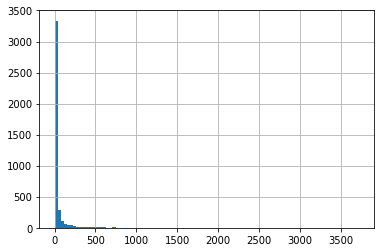

In [235]:
fondsen.aantal.hist(bins=100)

In [227]:
fnds

,from,number,percent,to,totaal
0,1000,27,22.366520,3726,39784
1,500,42,15.952393,1000,28375
2,200,128,22.453099,500,39938
3,100,156,12.601688,200,22415
4,20,728,18.305757,100,32561
5,10,469,3.980930,20,7081
6,5,467,1.989622,10,3539
7,1,1038,1.787230,5,3179


In [228]:
fnds.percent.sum()


99.43723892889872

In [229]:
fnds.number.sum()

3055

In [260]:
fondsen.columns

Index(['fonds', 'aantal'], dtype='object')

In [333]:
import re
from collections import Counter
pat = "\s"
wrds = []
for f in fondsen.fonds:
    wrds.extend(re.split('\s', f.lower()))
c = Counter(wrds)
xdf = pd.DataFrame().from_records(list(c.most_common(100))).rename(columns={0:'terms', 1:'aantal'})
xdf

,terms,aantal
0,,4048
1,van,1261
2,inventaris,664
3,het,593
4,a...,531
5,familie,508
6,de,377
7,...,332
8,en,218
9,gemeente,190


In [340]:
fondsen.loc[fondsen.fonds.str.contains('schepenbank')]


,fonds,aantal


In [341]:
for item in ['fam', 'kapit', 'biss', 'kerk', 'dom', 'parochie', 'schep']:
    pat = re.compile('.*{}.*'.format(item))
    res = cdf.loc[cdf.terms.isin([k for k in cdf.terms.unique() if pat.search(k) != None ])]
    print(item, ':', res.aantal.sum())

fam : 584
kapit : 20
biss : 3
kerk : 52
dom : 20
parochie : 79
schep : 59


## Some alternatives for regex matching

In [ ]:
cdf = pd.DataFrame().from_records(list(c.items())).rename(columns={0:'terms', 1:'aantal'})
cdf

In [310]:
import re
def regex_filter(val):
    if val:
        mo = re.search(regex,val)
        if mo:
            return True
        else:
            return False
    else:
        return False

cdf_filtered = cdf[cdf.terms.apply(re.search('fam.*'))]

# no cigar, or I don't understand this

TypeError: search() missing 1 required positional argument: 'string'

In [315]:
cdf.loc[cdf.terms.str.contains('fam')]

,terms,aantal
40,familie,508
97,famili...,1
206,families,31
303,familiepap...,1
318,famil...,16
373,familiearc...,2
601,familiear...,1
973,famile,1
1050,familiearchief,14
1163,fam...,4


In [279]:
ks = [k for k in c.keys() if 'fam' in k ]
ks 

['familie',
 'famili...',
 'families',
 'familiepap...',
 'famil...',
 'familiearc...',
 'familiear...',
 'famile',
 'familiearchief',
 'fam...',
 'familie,',
 'familie-',
 'familie...']

## overview numbers per century

In [ ]:
def get_years(url= url, begin=1000, end=1800, step=1):
    """collect the number of results from a range of years between
    begin and end with a step"""
    year_overz = []
    years = range(begin, end, step)
    pairs = [(years[i], years[i + 1]) for i in range(len(years)-1)] 
    for pair in pairs:
        queryparts['mibj'] = pair[0]
        queryparts['miej'] = pair[1]   
        result = requests.get(url, params=queryparts)
        soup = BeautifulSoup(result.text, 'html5lib')
        aantal = soup.find_all(class_='mi_hits_hits_count')[0].text.strip()
        year_overz.append({'yr': '%s-%s' % (pair[0], pair[1]), 'number': aantal})
    return year_overz


In [668]:
wpd = pd.ExcelFile('dcn/charter_csvs/overzicht_wrds.xlsx')

In [669]:
wpd.sheet_names

['overzicht_wrds', 'Blad1']

In [670]:
overzicht = wpd.parse('Blad1')

In [726]:
overzicht.rename(columns={'Unnamed: 19' : 'total', 'Unnamed: 0' : 'term'}, inplace=True)

overzicht.columns


Index(['term', '925-1000', '1005-1055', '1055-1100', '1105-1145', '1155-1200',
       '1205-1245', '1255-1300', '1305-1345', '1355-1400', '1405-1445',
       '1455-1500', '1505-1545', '1555-1600', '1605-1645', '1655-1700',
       '1705-1745', '1755-1800', '1805-1845', 'total'],
      dtype='object')

In [740]:
pat = re.compile('a[ck]+te')

overzicht.query("term == 'akte'")

,term,925-1000,1005-1055,1055-1100,1105-1145,1155-1200,1205-1245,1255-1300,1305-1345,1355-1400,1405-1445,1455-1500,1505-1545,1555-1600,1605-1645,1655-1700,1705-1745,1755-1800,1805-1845,total
244,akte,8.0,39.0,22.0,21.0,31.0,41.0,48.0,42.0,75.0,92.0,80.0,46.0,41.0,40.0,50.0,41.0,62.0,26.0,805.0


In [866]:
dset.columns

Index(['term', '925-1000', '1005-1055', '1055-1100', '1105-1145', '1155-1200',
       '1205-1245', '1255-1300', '1305-1345', '1355-1400', '1405-1445',
       '1455-1500', '1505-1545', '1555-1600', '1605-1645', '1655-1700',
       '1705-1745', '1755-1800', '1805-1845', 'total', 'normterm'],
      dtype='object')

In [867]:
dset = overzicht.query('total > 30')
dset.iloc[0][0]
wrdlst = dset['term']
dset

,term,925-1000,1005-1055,1055-1100,1105-1145,1155-1200,1205-1245,1255-1300,1305-1345,1355-1400,...,1455-1500,1505-1545,1555-1600,1605-1645,1655-1700,1705-1745,1755-1800,1805-1845,total,normterm
88,abt,0.0,0.0,0.0,5.0,1.0,5.0,6.0,4.0,3.0,...,3.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,38.0,abt
110,acte,0.0,3.0,0.0,2.0,0.0,0.0,5.0,16.0,1.0,...,3.0,5.0,2.0,12.0,4.0,8.0,2.0,1.0,64.0,archieftermen
199,afkomstig,0.0,1.0,0.0,1.0,0.0,0.0,2.0,7.0,0.0,...,0.0,0.0,0.0,2.0,6.0,1.0,0.0,12.0,32.0,afkomstig
214,afschrift,8.0,0.0,1.0,3.0,2.0,6.0,7.0,3.0,2.0,...,6.0,3.0,1.0,2.0,1.0,2.0,3.0,6.0,58.0,afschrift
244,akte,8.0,39.0,22.0,21.0,31.0,41.0,48.0,42.0,75.0,...,80.0,46.0,41.0,40.0,50.0,41.0,62.0,26.0,805.0,archieftermen
245,akten,0.0,6.0,3.0,3.0,2.0,5.0,3.0,3.0,8.0,...,4.0,1.0,4.0,7.0,11.0,9.0,2.0,2.0,80.0,archieftermen
411,april,0.0,5.0,1.0,1.0,4.0,2.0,4.0,7.0,7.0,...,4.0,5.0,8.0,0.0,0.0,1.0,1.0,1.0,56.0,april
480,augustus,0.0,1.0,0.0,1.0,1.0,4.0,3.0,2.0,3.0,...,3.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,33.0,augustus
637,behoeve,0.0,3.0,0.0,2.0,2.0,1.0,3.0,9.0,5.0,...,10.0,2.0,2.0,4.0,2.0,2.0,4.0,4.0,56.0,behoeve
901,bisschop,0.0,26.0,3.0,14.0,8.0,9.0,11.0,13.0,14.0,...,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0,kerk


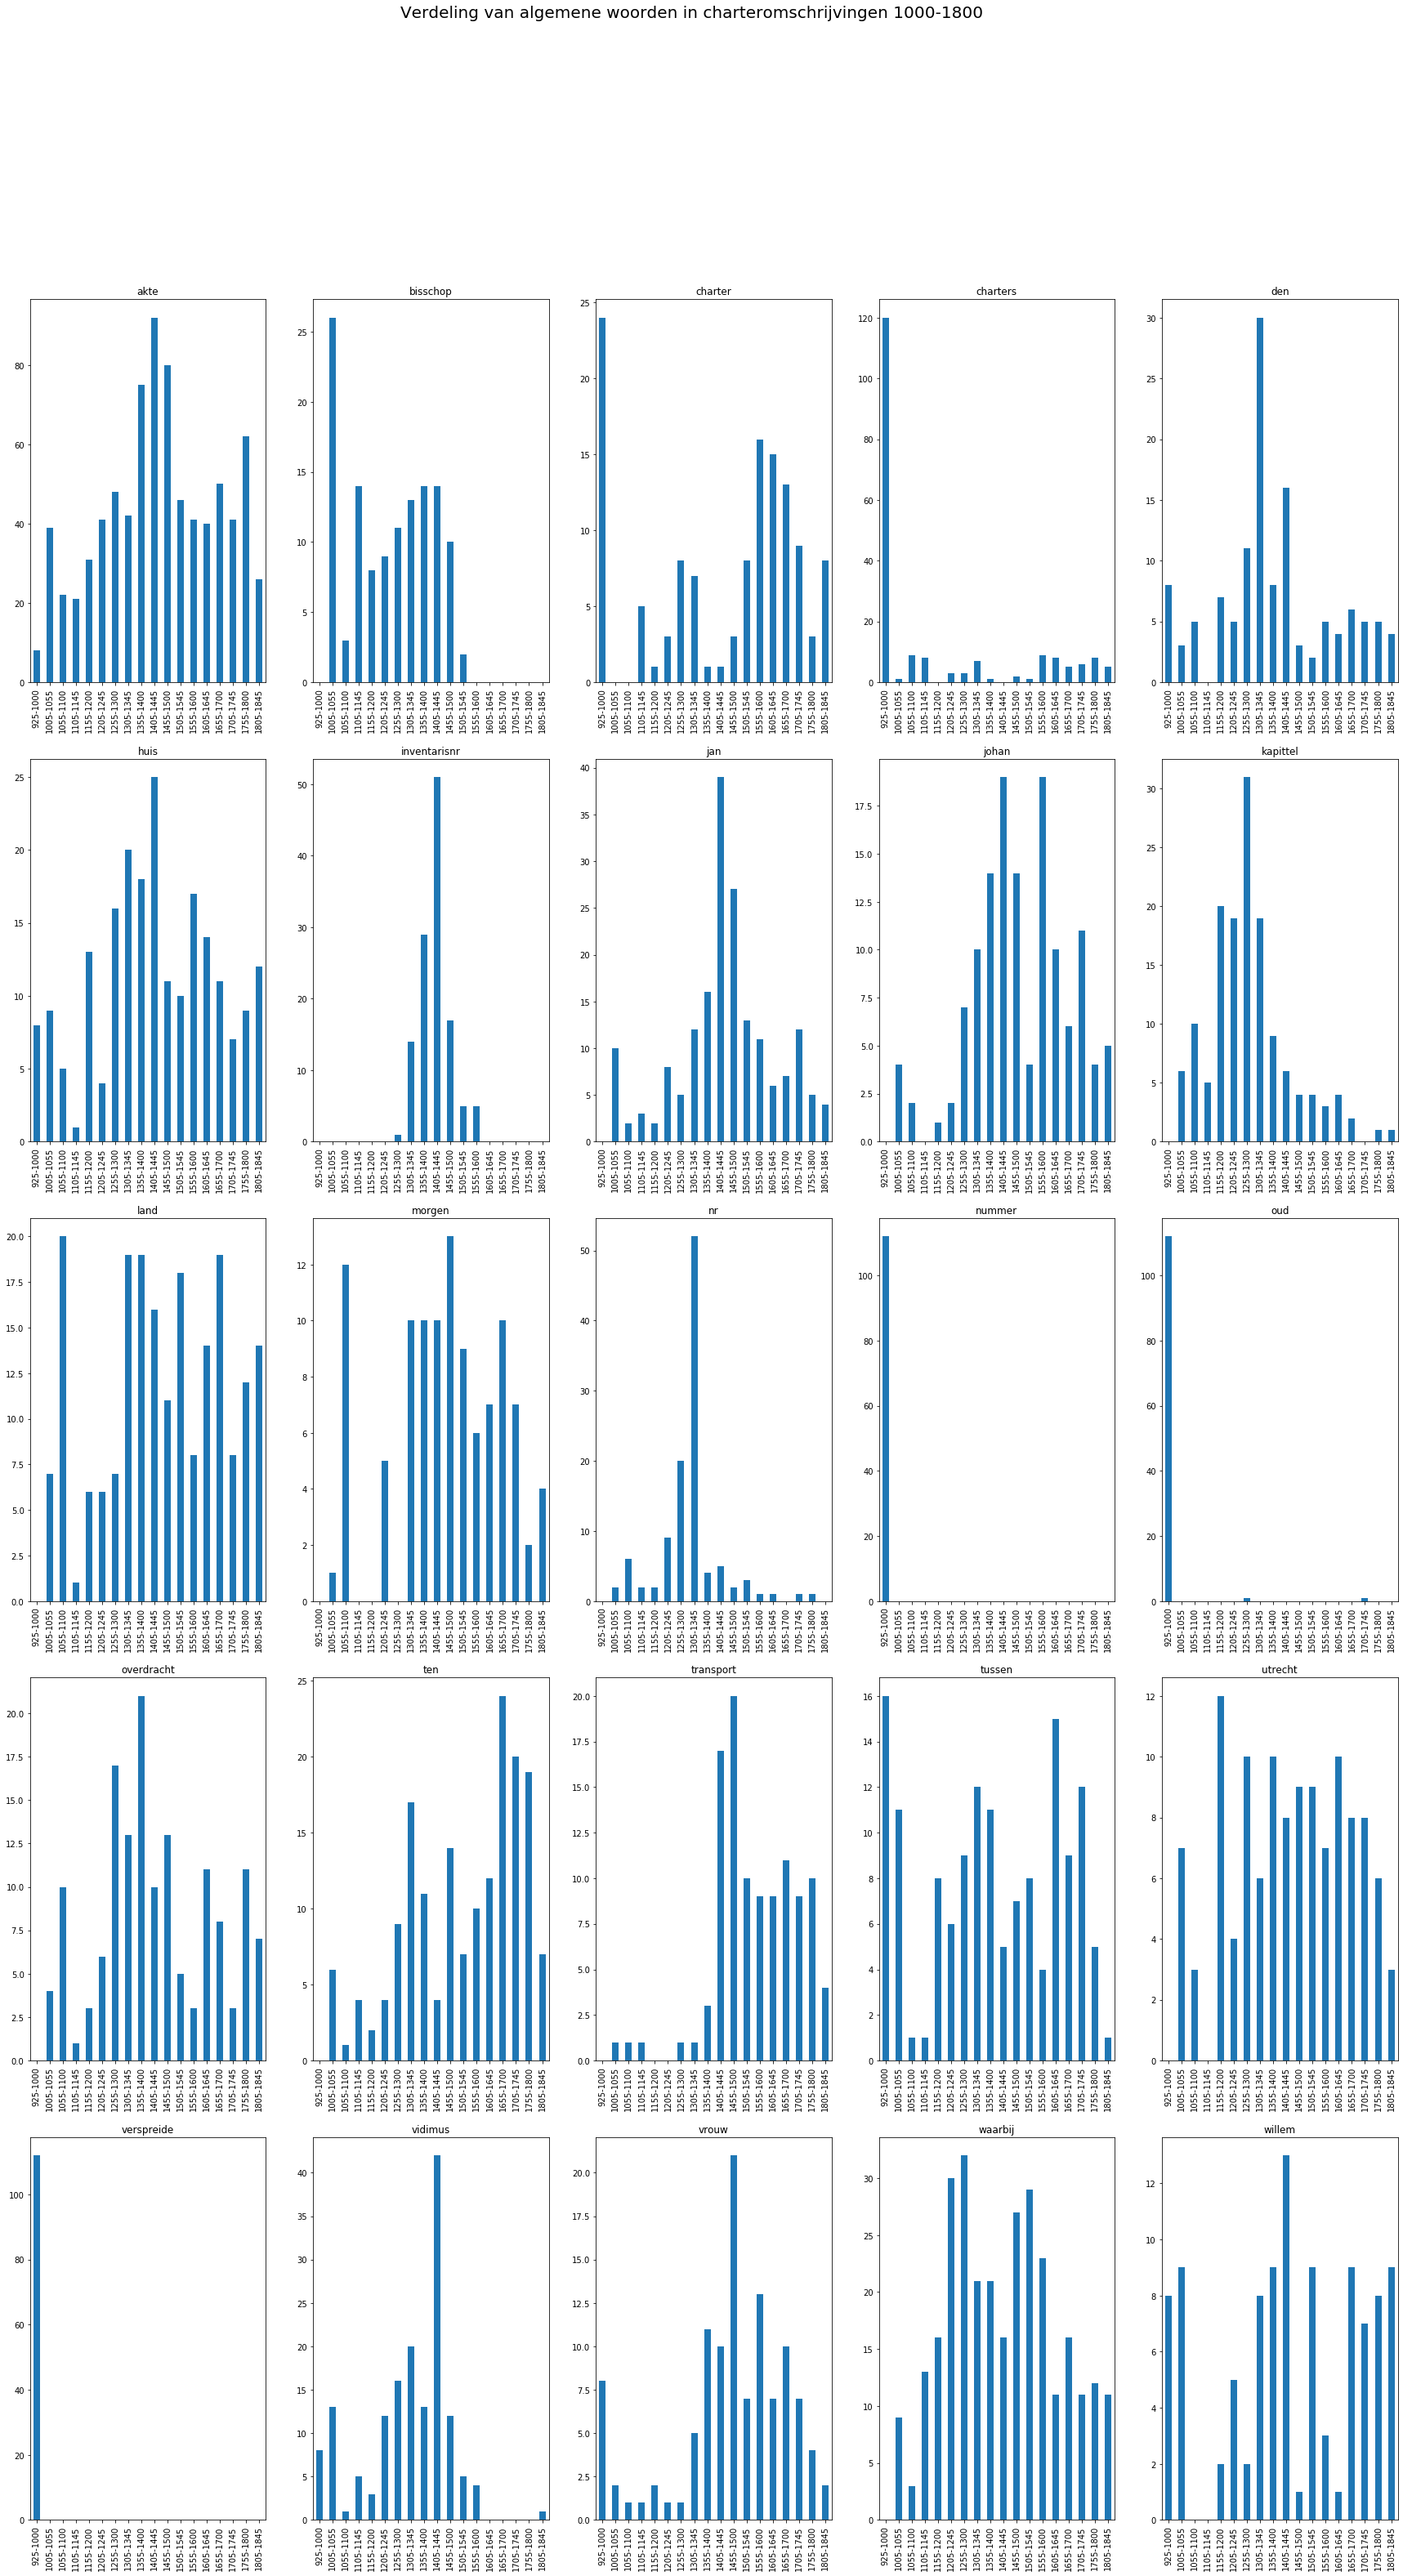

In [714]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,50))
fig.suptitle("Verdeling van algemene woorden in charteromschrijvingen 1000-1800",fontsize=20)

for t in range(0, len(dset)):
    s = dset.iloc[t][2:-1] # we kick out the 10th century because all dates are wrong
    ax = fig.add_subplot(5,5,t+1)
    s.plot.bar(ax=ax, rot=90)         
    ax.set_title("{}".format(dset.iloc[t][0]))



In [707]:
s

925-1000      8
1005-1055    39
1055-1100    22
1105-1145    21
1155-1200    31
1205-1245    41
1255-1300    48
1305-1345    42
1355-1400    75
1405-1445    92
1455-1500    80
1505-1545    46
1555-1600    41
1605-1645    40
1655-1700    50
1705-1745    41
1755-1800    62
1805-1845    26
Name: 244, dtype: object

In [679]:
wrdso = wpd.parse('overzicht_wrds')

In [680]:
wrdso.head()


,Unnamed: 0,925,935,945,955,965,975,985,995,1005,...,1765,1775,1785,1795,1805,1815,1825,1835,1845,Unnamed: 94
0,aafjen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,aal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aalborg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aalborg:3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aalborggevidimeerd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [758]:
import numpy as np
terms = [term for term in overzicht.term if type(term) == str]
terms

['aafjen',
 'aal',
 'aalborg',
 'aalborg:3',
 'aalborggevidimeerd',
 'aalbrecht',
 'aalbrechtszn',
 'aalbrechtsznkopie',
 'aaltien',
 'aaltje',
 'aanbieden',
 'aandammingen',
 'aandeel',
 'aandelen',
 'aangaan',
 'aangaande',
 'aangeboden',
 'aangeduid',
 'aangegaan',
 'aangegane',
 'aangehecht',
 'aangehechte',
 'aangekocht',
 'aangekogt',
 'aangekomen',
 'aangelegd',
 'aangenomen',
 'aangesproken',
 'aangesteld',
 'aangetaste',
 'aangewezen',
 'aangezien',
 'aanhangend',
 'aankomsttitel',
 'aankomsttitels',
 'aankoop',
 'aanleiding',
 'aanmatiging',
 'aannemers',
 'aanspraken',
 'aanstelling',
 'aanstellingen',
 'aanstellingsakte',
 'aantal',
 'aanteekening',
 'aantekening',
 'aantekeningen',
 'aanvaarden',
 'aanvaarden.1323',
 'aanvaarding',
 'aanvraagnr',
 'aanvrage',
 'aanvulling',
 'aanwas',
 'aanwassende',
 'aanwezig',
 'aanwijzingen',
 'aanzien',
 'aar',
 'aard',
 'aarde',
 'aarle-beek',
 'aarlen',
 'aarn',
 'aarnoud',
 'aarnout',
 'aarnt',
 'aarntszn',
 'aarntsznszn',
 'aarnty

In [950]:
verzameltermen = {'archieftermen': ['chart.*', '^a[ck]+te.*', '^nummer', '\b(nr)', 'inventarisn(umme)?r'],
                 'koop' : ['ko[ch|g]+t', 'koop'],
                 'leen': ['(be)?leen', 'lijftocht'],
                 'pacht': ['.*pa[g|ch]+t.*'],
                 'land': ['morgen.*', '^akker', '.*grond.*'],
                 'rente': ['.*rente.*'],
                 'kerk': ['.*bisschop.*', '.*kapit.*', '.*kerk.*', '^tiend.*', 
                          'kloos.*', 'ab[td].*', 'altaa?r.*'],
                 'stad': ['.*st[a|e]d.*'],
                 'huis': ['hui[z|s]*'],
                 'benoeming': ['noeming.*', 'aanstelling']}


In [951]:
for verzamelterm in verzameltermen.keys():
    zktermen = []
    for pat in verzameltermen[verzamelterm]:
        zktermen.extend([t for t in terms if re.search(pat, t) != None])
    norm[verzamelterm] = zktermen

In [952]:
#manually adjust this for off terms. We still need to do this for the rest
norm['leen'] =['beleend',
 'beleening',
 'beleent',
 'borgleen',
 'leen',
 'leen-',
 'leen-en',
 'leenakte',
 'leenbrief',
 'leendert',
 'leengoed',
 'leengoederen',
 'leenhof',
 'leenhulde',
 'leenkamer',
 'leenmannen',
 'leenroerig',
 'leenten',
 'leenten:1/4',
 'leentyen',
 'ringie-leen',
 'sleen',
 'lijftocht']

In [953]:



rev_norms = {svalue: key for key, value in norm.items() for svalue in value}
rev_norms


{'burchart': 'archieftermen',
 'charter': 'archieftermen',
 'charterberging': 'archieftermen',
 'charterboek': 'archieftermen',
 'chartern.b': 'archieftermen',
 'charters': 'archieftermen',
 'charters-geschiedkundige': 'archieftermen',
 'chartersn.b': 'archieftermen',
 'charterverzameling': 'archieftermen',
 "scuts'.charter": 'archieftermen',
 'acte': 'archieftermen',
 'acten': 'archieftermen',
 'akte': 'archieftermen',
 'akten': 'archieftermen',
 'aktes': 'archieftermen',
 'aktevan': 'archieftermen',
 'nummer': 'archieftermen',
 'inventarisnr': 'archieftermen',
 'inventarisnummer': 'archieftermen',
 'aangekocht': 'koop',
 'aangekogt': 'koop',
 'afgekocht': 'koop',
 'gekocht': 'koop',
 'gekochtdoor': 'koop',
 'gekochte': 'koop',
 'gekochtgevidimeerd': 'koop',
 'gekogt': 'koop',
 'grumbachgekocht': 'koop',
 'verkocht': 'koop',
 'verkochte': 'koop',
 'verkogt': 'koop',
 'vorkocht': 'koop',
 'aankoop': 'koop',
 'afkoop': 'koop',
 'afkoopgelden': 'koop',
 'afkoopt': 'koop',
 'goedkoop': 'k

In [954]:
overzicht['normterm'] = overzicht.term.replace(rev_norms)
overzicht.normterm = overzicht.normterm.astype('category')
for term in verzameltermen:
    print(term, overzicht.query("normterm == '{}'".format(term)).total.sum())

archieftermen 1572.0
koop 201.0
leen 77.0
pacht 97.0
land 342.0
rente 147.0
kerk 728.0
stad 180.0
huis 343.0
benoeming 47.0


In [956]:
overzicht.query("normterm not in {} and total > 30".format(list(verzameltermen.keys())))


,term,925-1000,1005-1055,1055-1100,1105-1145,1155-1200,1205-1245,1255-1300,1305-1345,1355-1400,...,1455-1500,1505-1545,1555-1600,1605-1645,1655-1700,1705-1745,1755-1800,1805-1845,total,normterm
199,afkomstig,0.0,1.0,0.0,1.0,0.0,0.0,2.0,7.0,0.0,...,0.0,0.0,0.0,2.0,6.0,1.0,0.0,12.0,32.0,afkomstig
214,afschrift,8.0,0.0,1.0,3.0,2.0,6.0,7.0,3.0,2.0,...,6.0,3.0,1.0,2.0,1.0,2.0,3.0,6.0,58.0,afschrift
411,april,0.0,5.0,1.0,1.0,4.0,2.0,4.0,7.0,7.0,...,4.0,5.0,8.0,0.0,0.0,1.0,1.0,1.0,56.0,april
480,augustus,0.0,1.0,0.0,1.0,1.0,4.0,3.0,2.0,3.0,...,3.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,33.0,augustus
637,behoeve,0.0,3.0,0.0,2.0,2.0,1.0,3.0,9.0,5.0,...,10.0,2.0,2.0,4.0,2.0,2.0,4.0,4.0,56.0,behoeve
939,boek,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,...,7.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,35.0,boek
1065,brief,0.0,0.0,0.0,0.0,3.0,5.0,4.0,9.0,2.0,...,2.0,2.0,1.0,0.0,0.0,0.0,0.0,5.0,33.0,brief
1391,cornelis,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,5.0,5.0,7.0,5.0,4.0,7.0,2.0,40.0,cornelis
1521,datum,24.0,0.0,0.0,0.0,2.0,0.0,1.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,datum
1532,december,0.0,0.0,0.0,0.0,0.0,2.0,6.0,6.0,6.0,...,1.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,35.0,december


<BarContainer object of 18 artists>

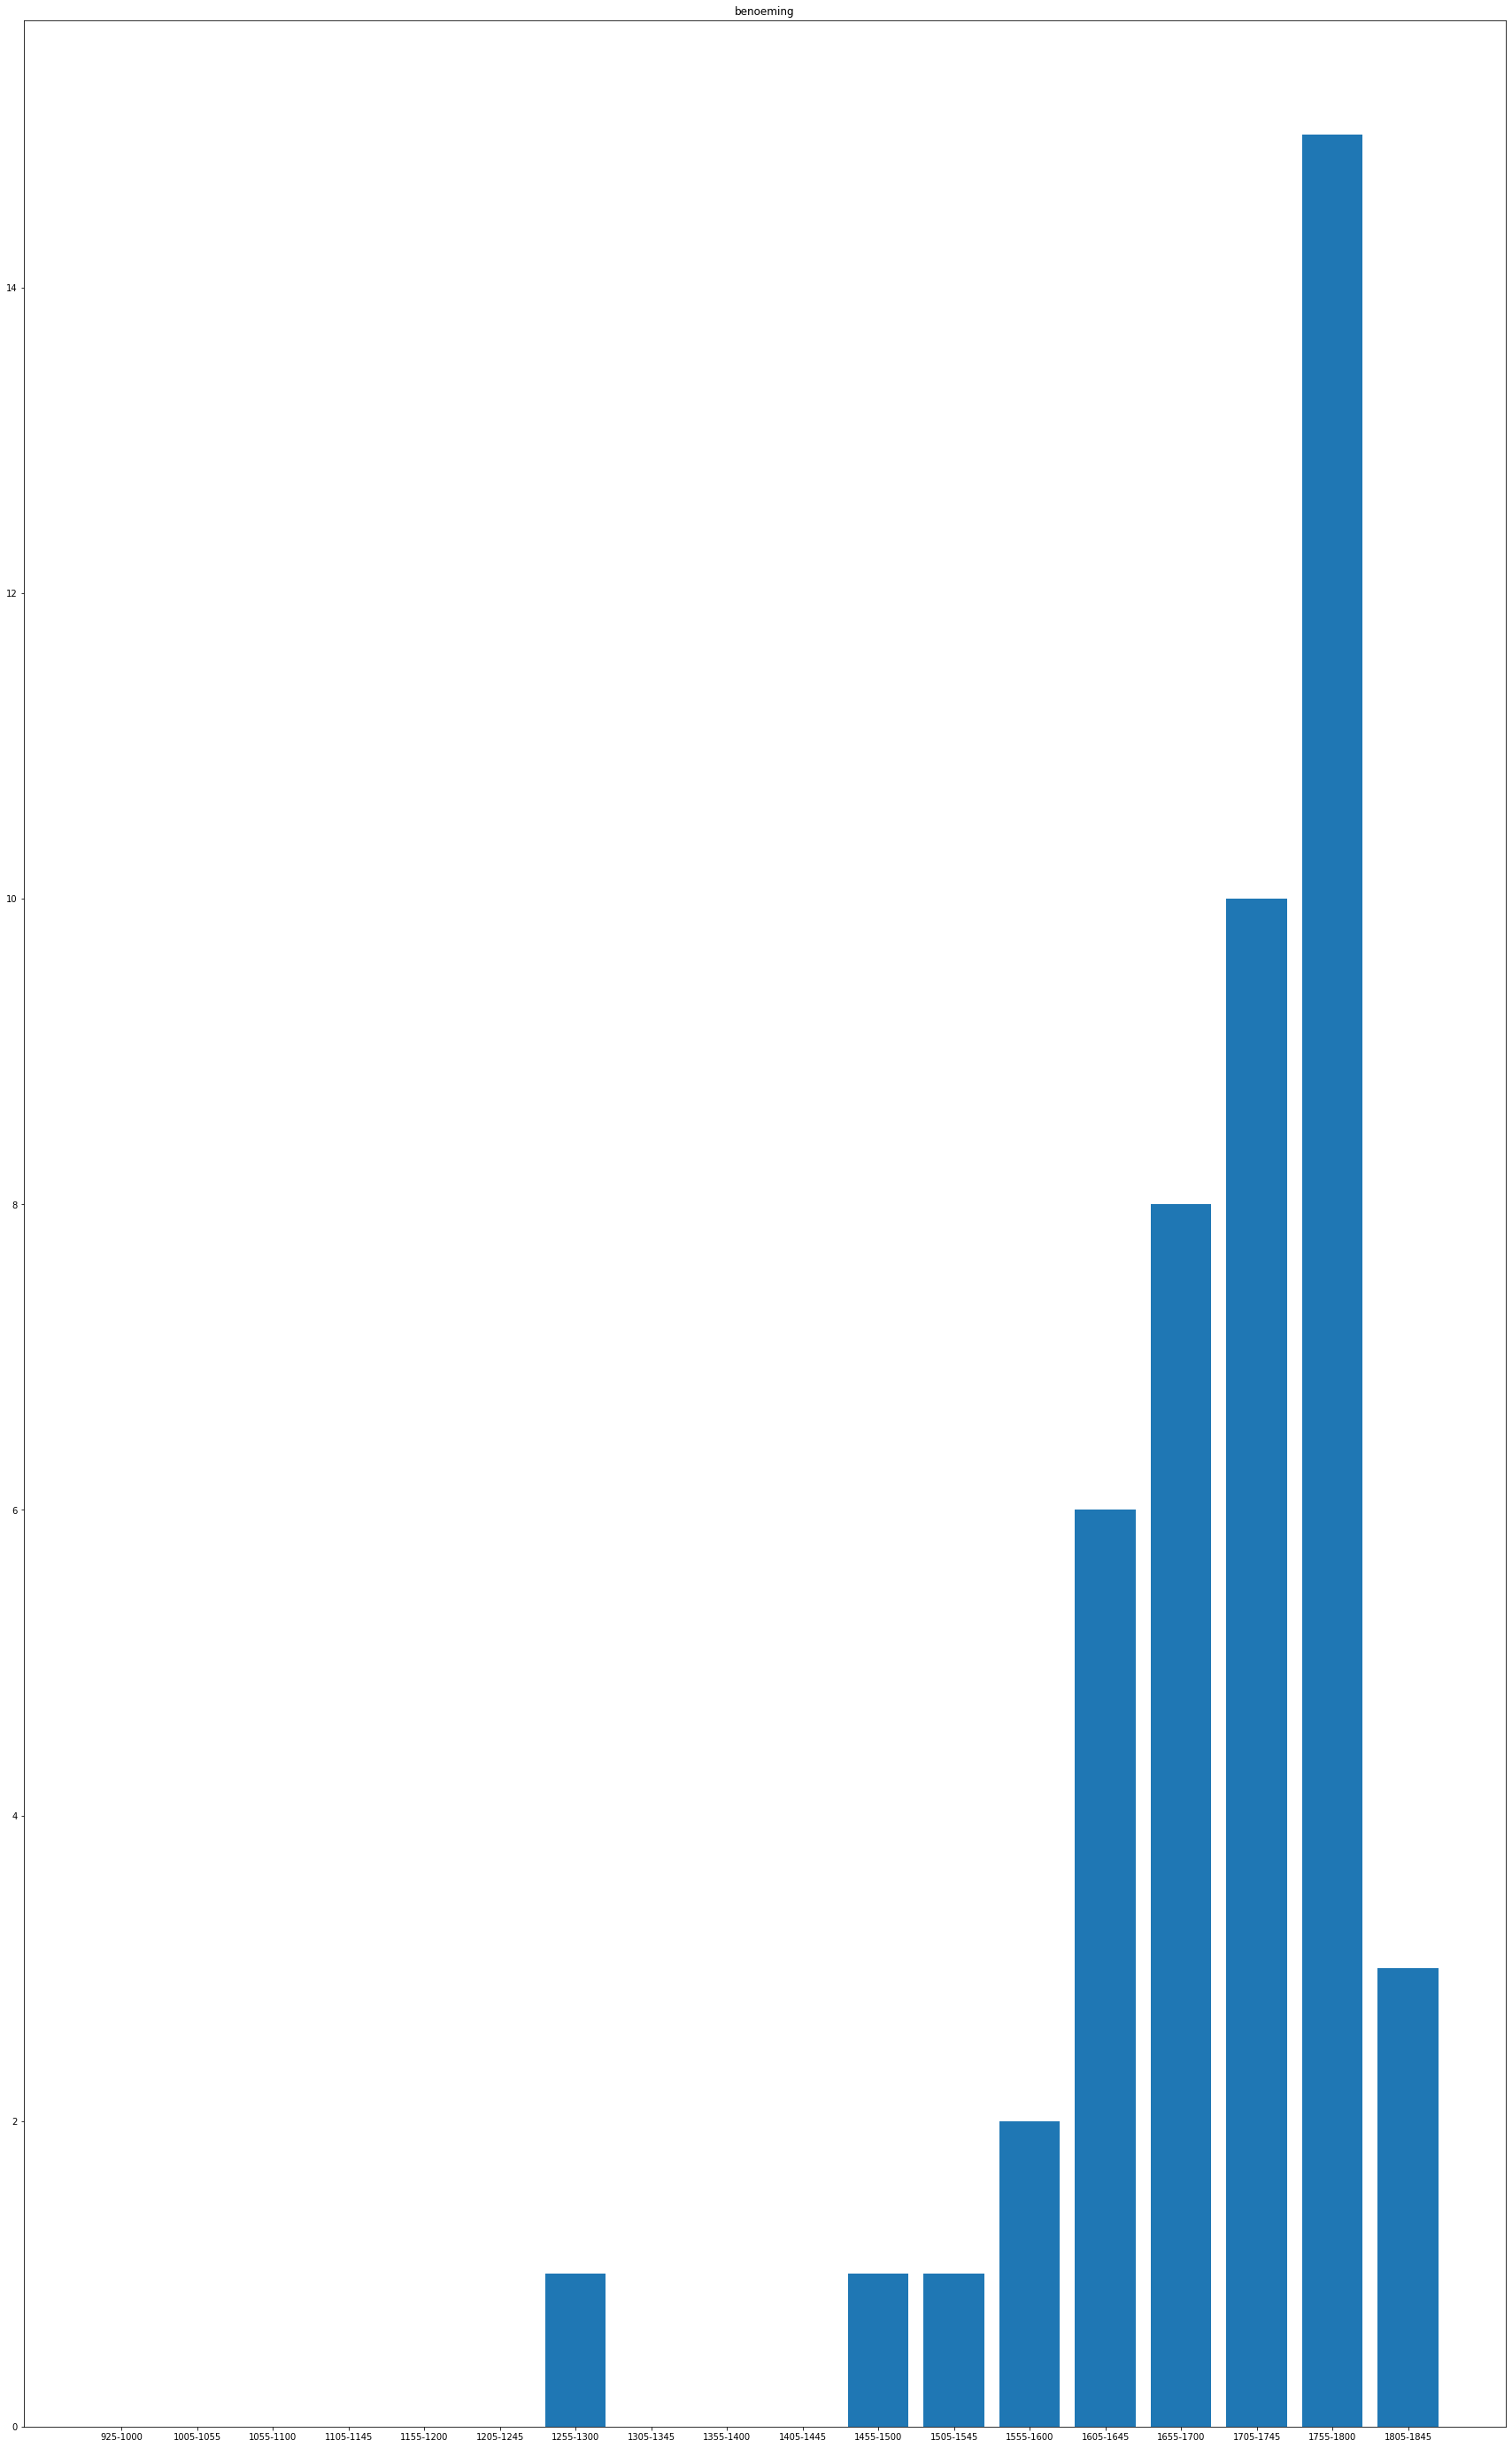

In [958]:
s = overzicht.query("normterm == '{}'".format(term))
summed = s.sum(axis=0)[1:-2]
fig = plt.figure(figsize=(30,50))
ax1 = fig.add_subplot(111)
ax1.set_title('{}'.format(term))
ax1.bar(s.columns[1:-2], summed)

In [962]:
termen = ['archieftermen', 'kerk', 'land', 'leen', 'koop','pacht', 'rente', 'stad', 'huis', 'benoeming']

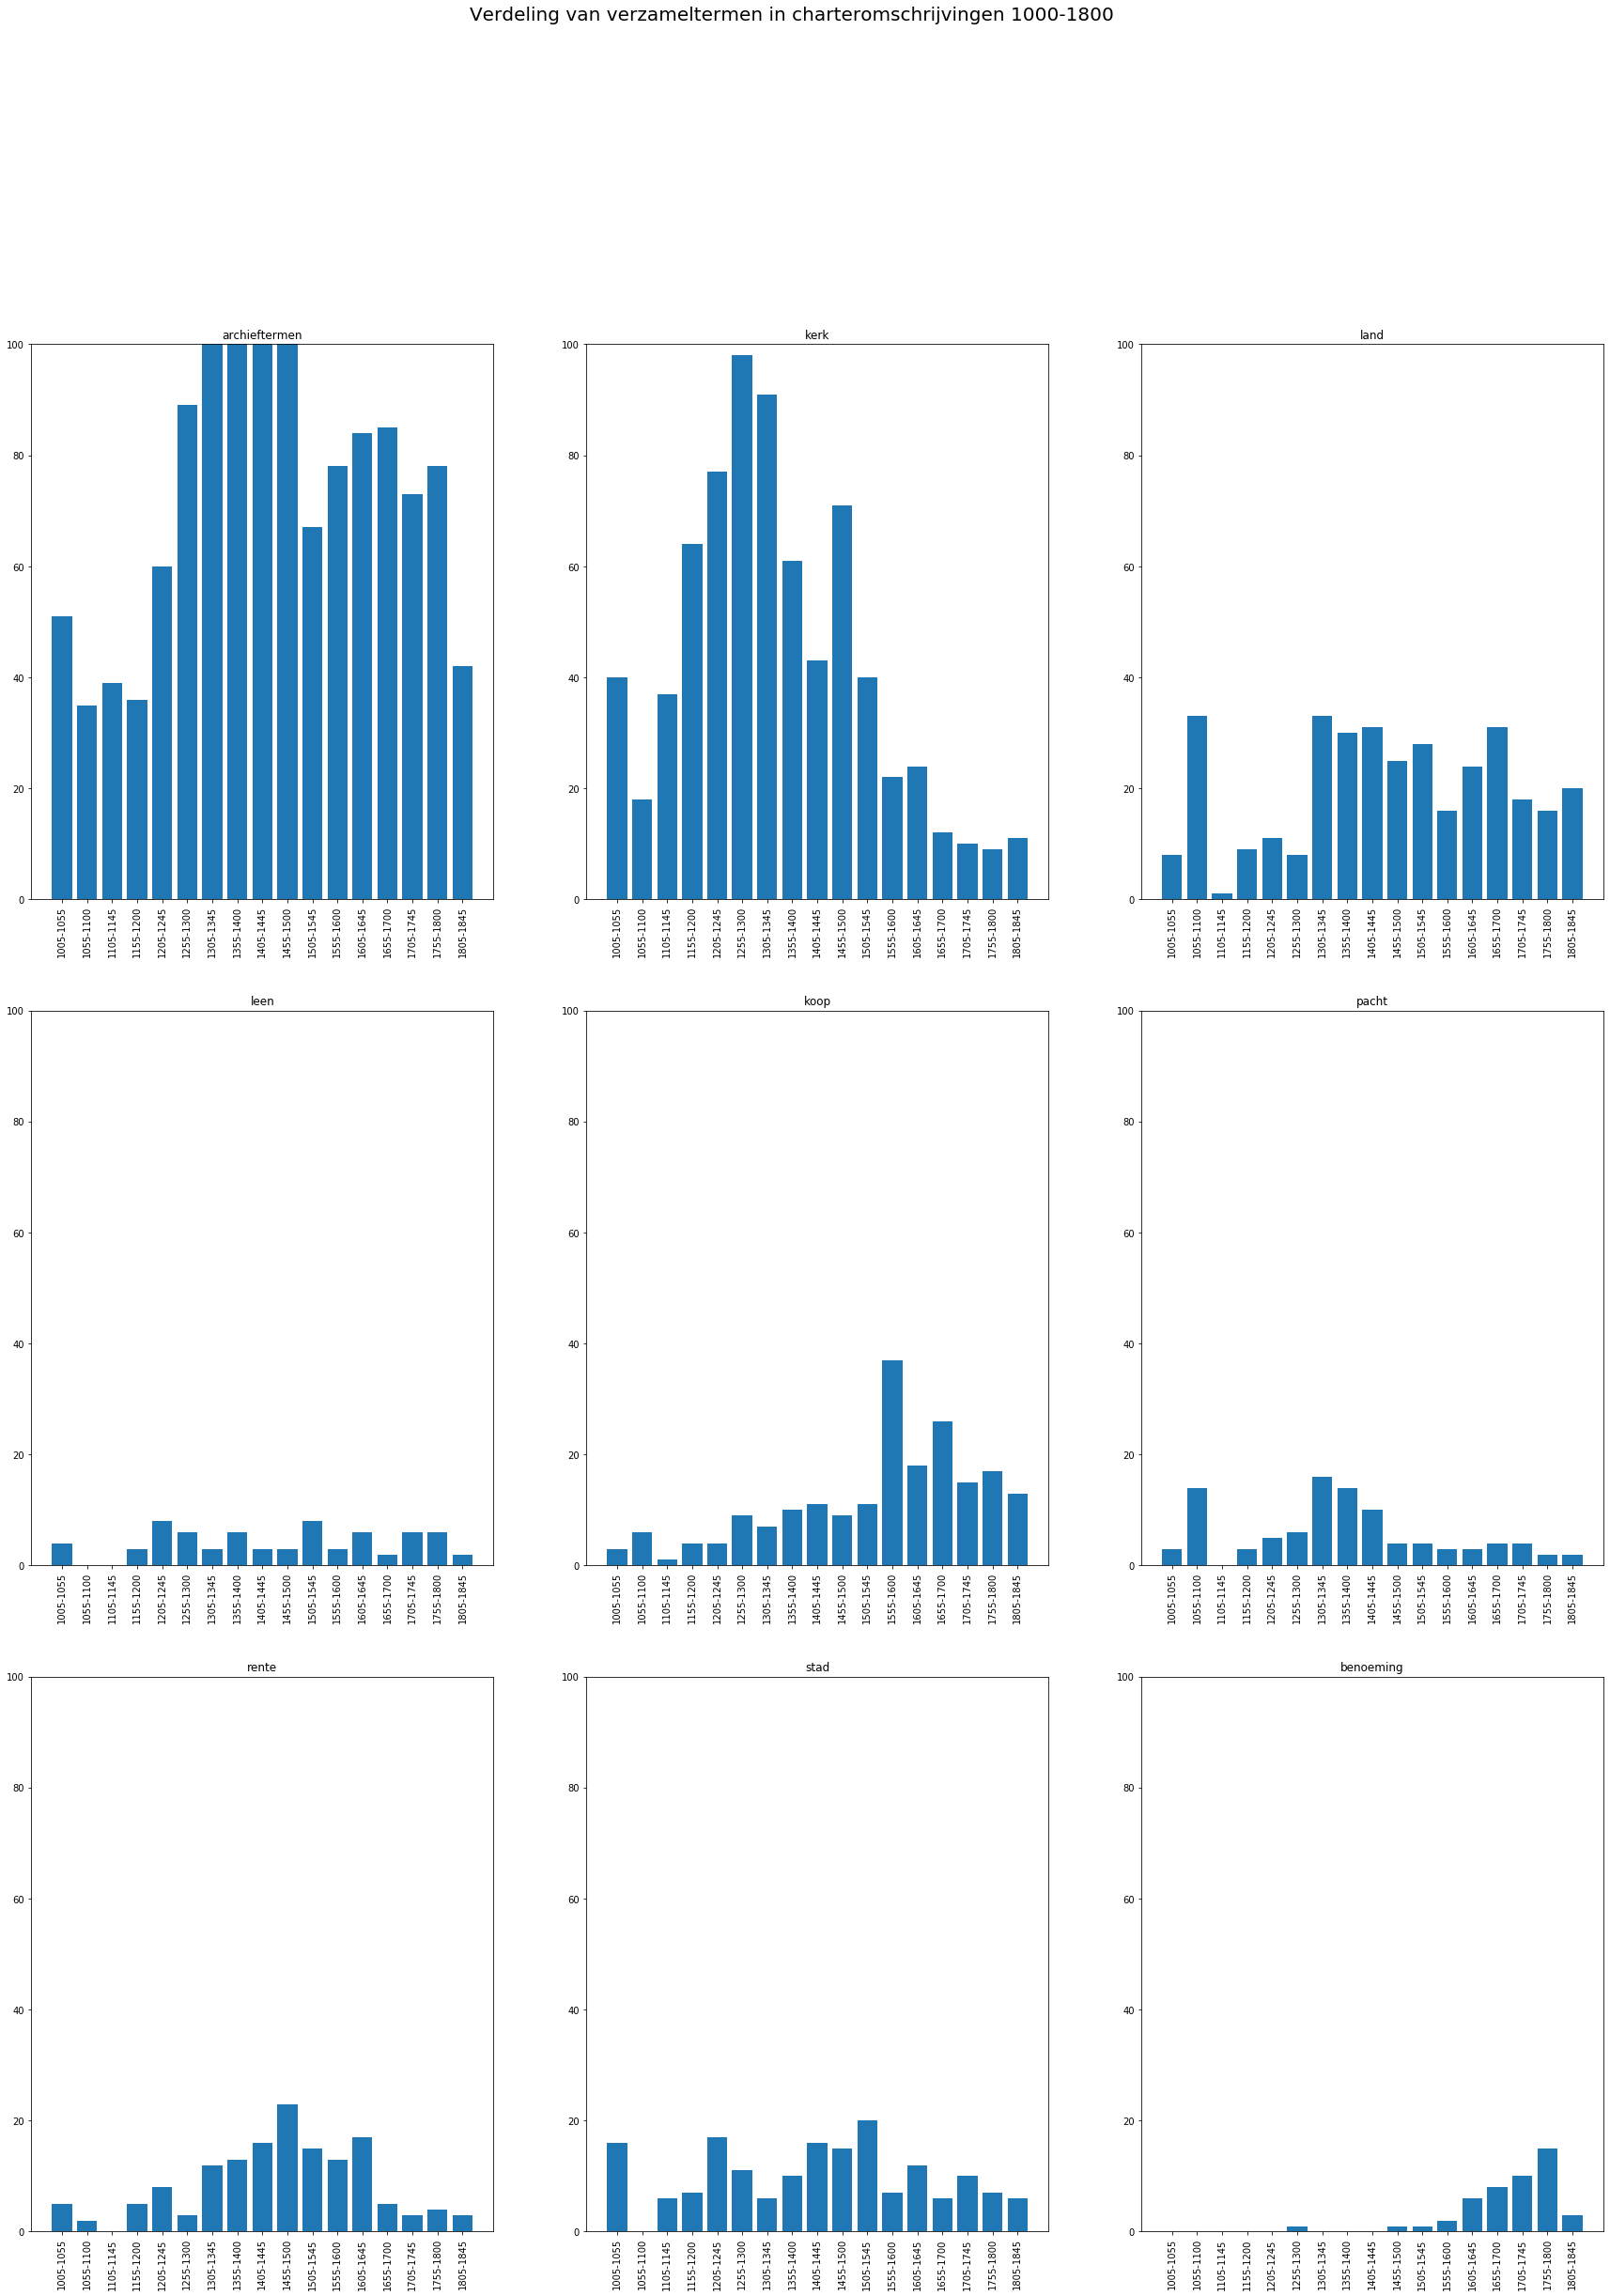

In [961]:
fig = plt.figure(figsize=(30,50))
fig.suptitle("Verdeling van verzameltermen in charteromschrijvingen 1000-1800",fontsize=20)

for t in enumerate(termen):
    term = t[1]
    s = overzicht.query("normterm == '{}'".format(term))
    ax = fig.add_subplot(len(verzameltermen.keys())/3+1,3,t[0]+1)
    summed = s.sum(axis=0)[2:-2]
    ax.bar(s.columns[2:-2], summed)
    ax.set_ylim(0,100)
    plt.xticks(rotation='vertical')
    ax.set_title("{}".format(term))

In [963]:
fig.savefig('dcn/images/term_overview.png')

In [924]:
# some tables for an overview per period

s = overzicht.query("normterm == '{}'".format('leen'))
s.term

676          beleend
677        beleening
678          beleent
982         borgleen
3951            leen
3952           leen-
3953         leen-en
3954        leenakte
3955       leenbrief
3956        leendert
3957        leengoed
3958    leengoederen
3959         leenhof
3960       leenhulde
3961       leenkamer
3962      leenmannen
3963      leenroerig
3964         leenten
3965     leenten:1/4
3966        leentyen
4050       lijftocht
5586     ringie-leen
5947           sleen
Name: term, dtype: object

<BarContainer object of 17 artists>

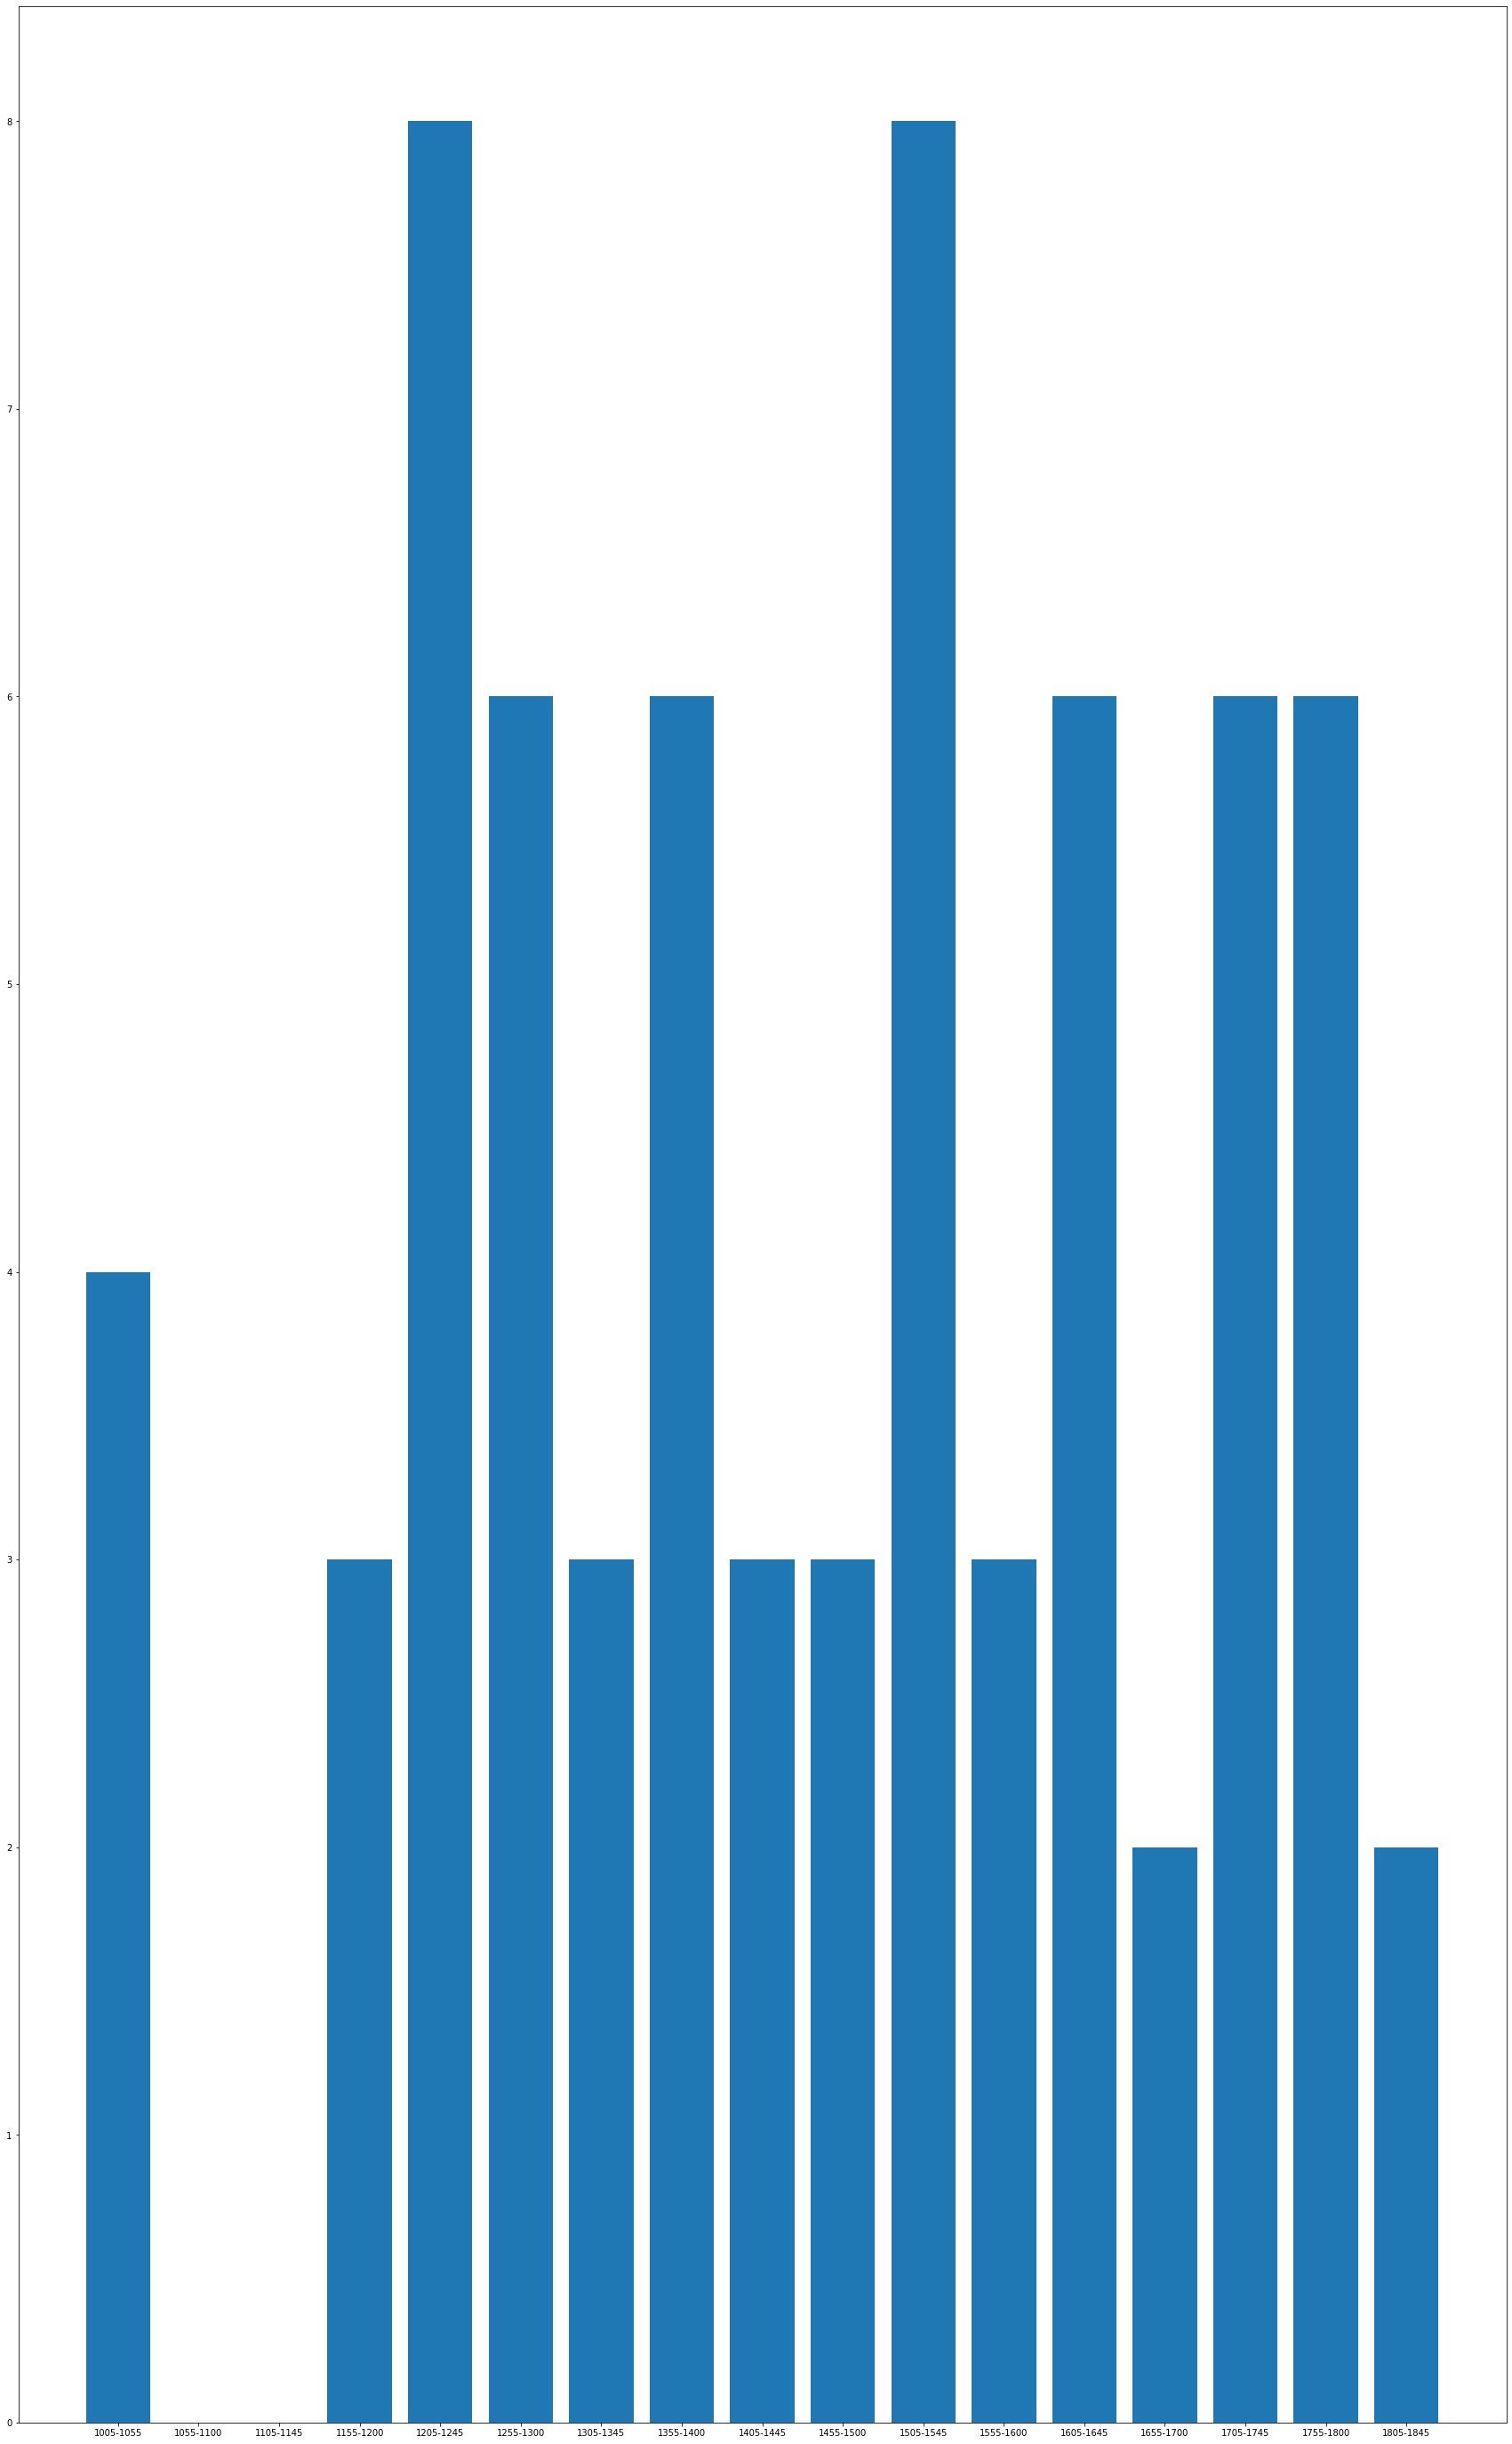

In [933]:
# some tables for leen, but no time to work this out now
s = overzicht.query("normterm == 'leen'")
summed = s.sum(axis=0)[2:-2]
fig = plt.figure(figsize=(30,50))
ax1 = fig.add_subplot(111)
ax1.bar(s.columns[2:-2], summed)

<BarContainer object of 18 artists>

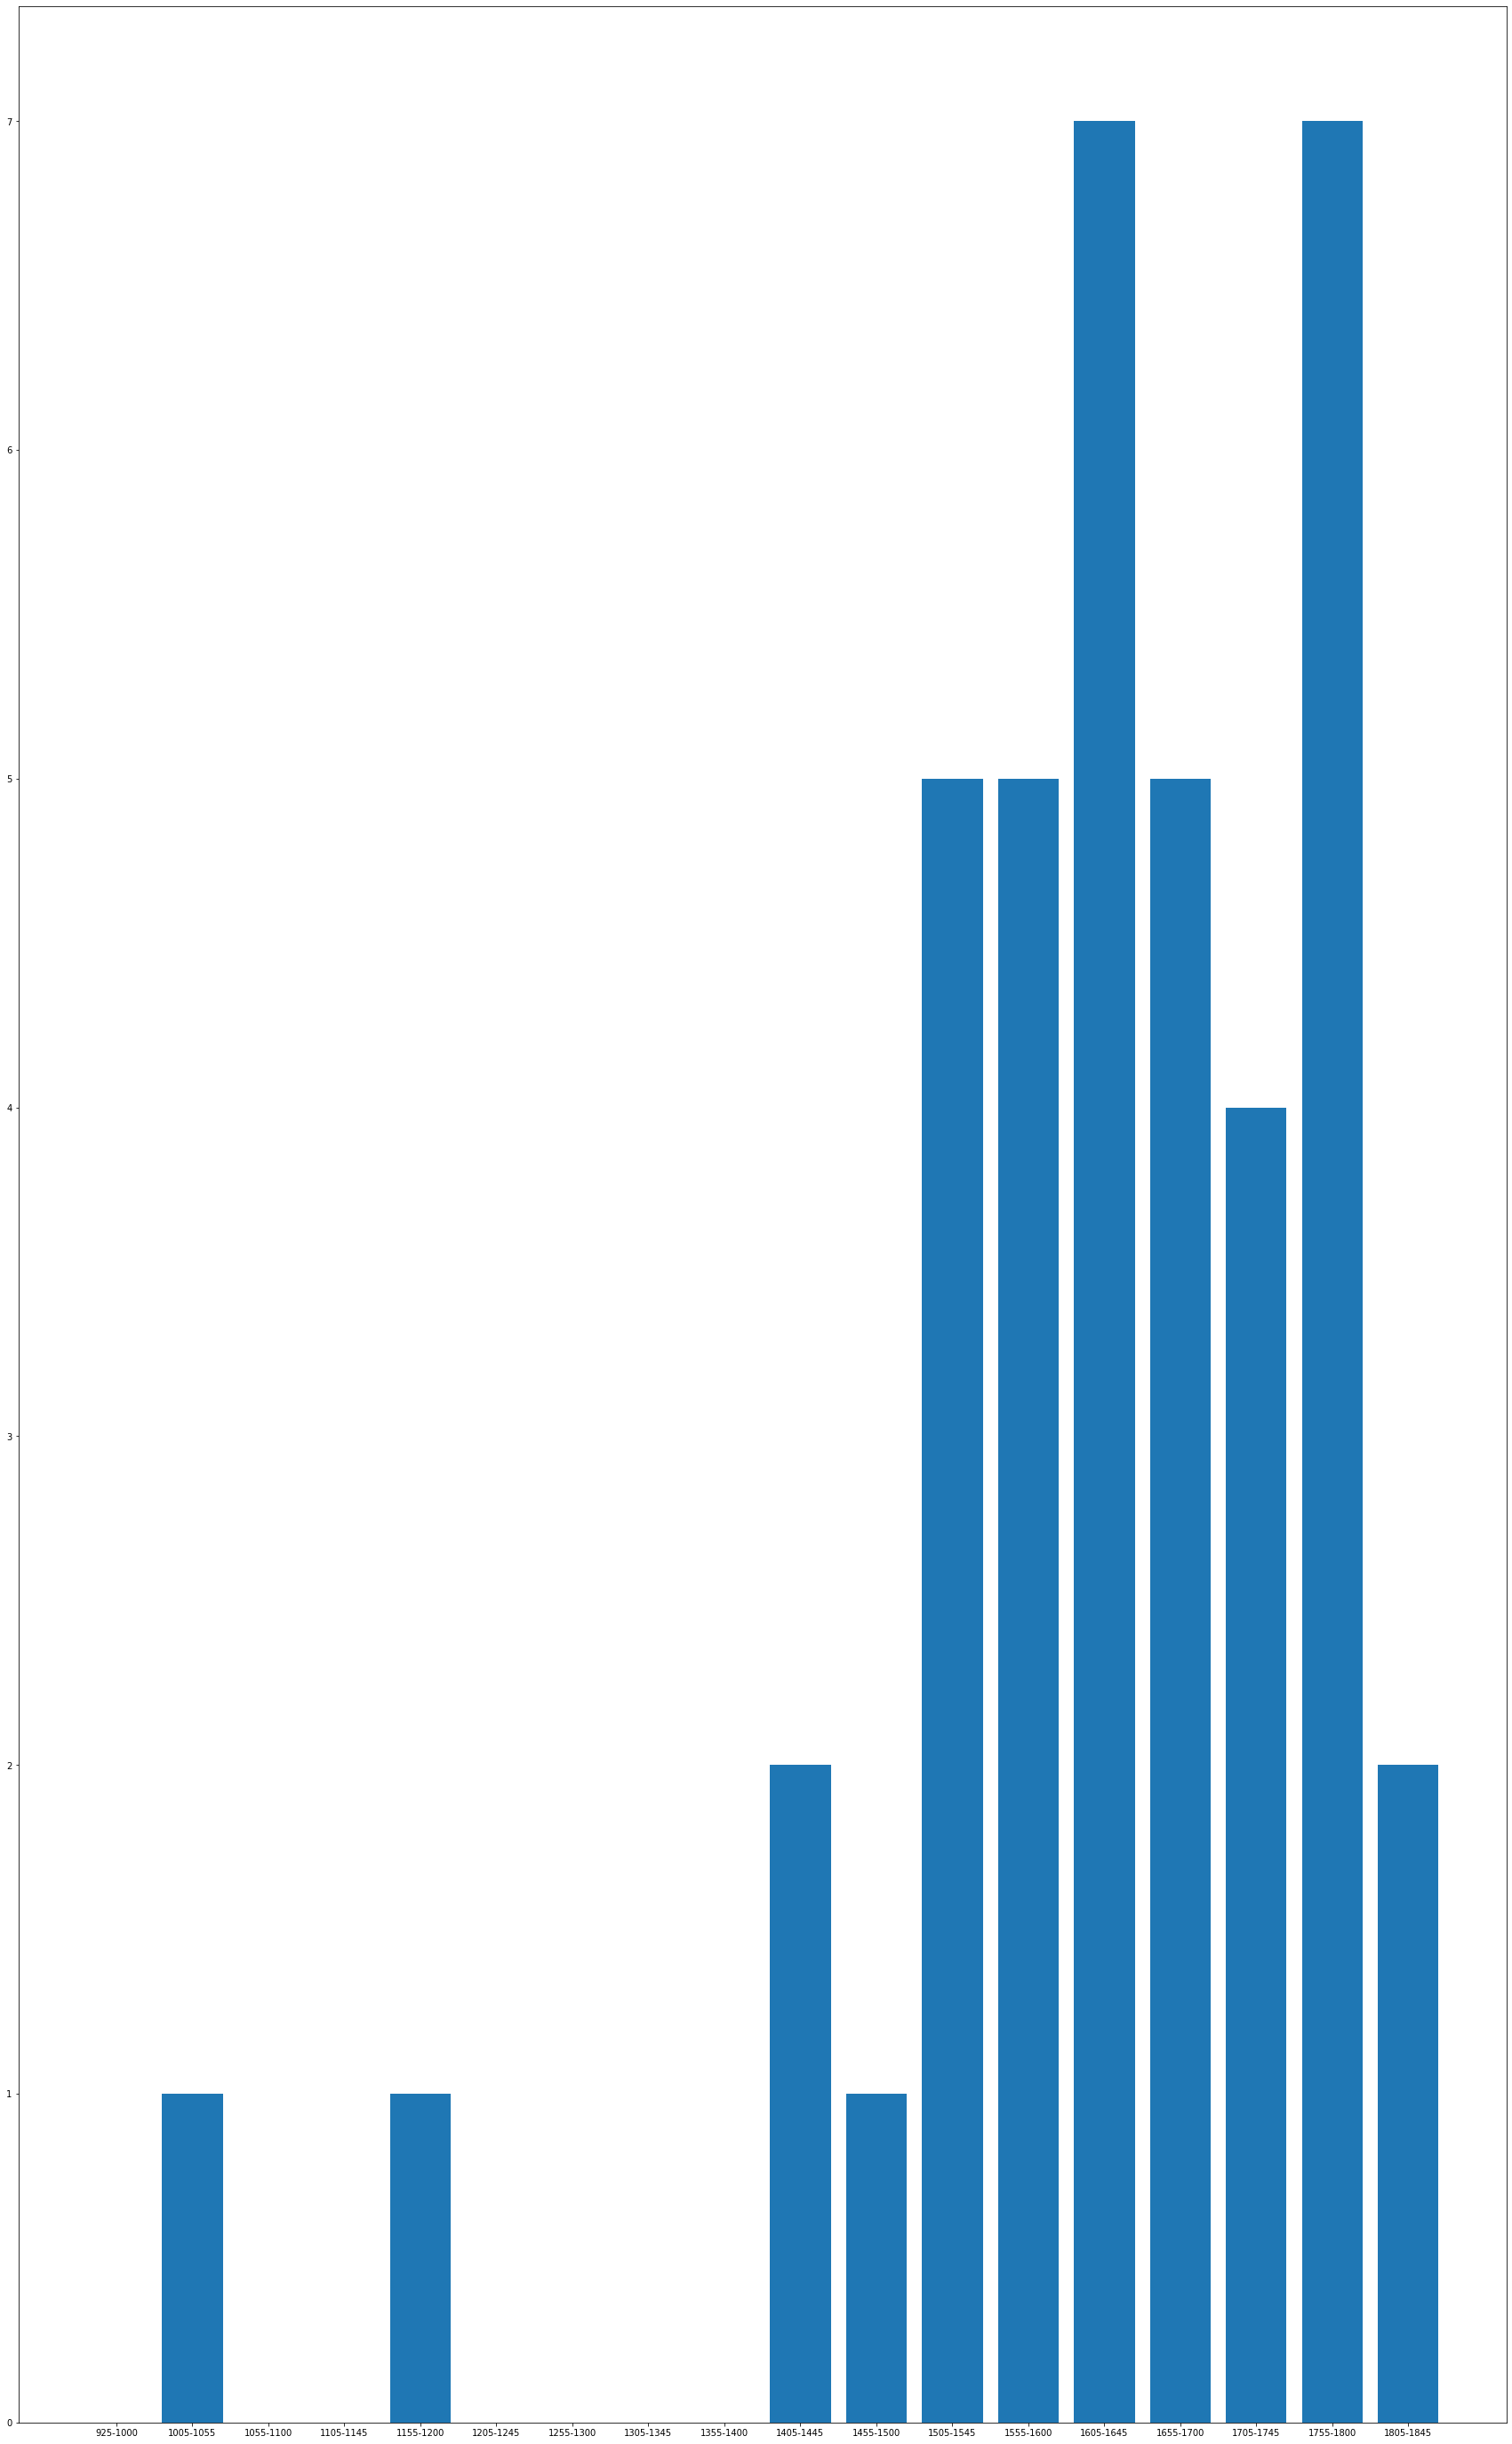

In [868]:
s = overzicht.query("term == 'cornelis'")
summed = s.sum(axis=0)[1:-2]
fig = plt.figure(figsize=(30,50))
ax1 = fig.add_subplot(111)
ax1.bar(s.columns[1:-2], summed)

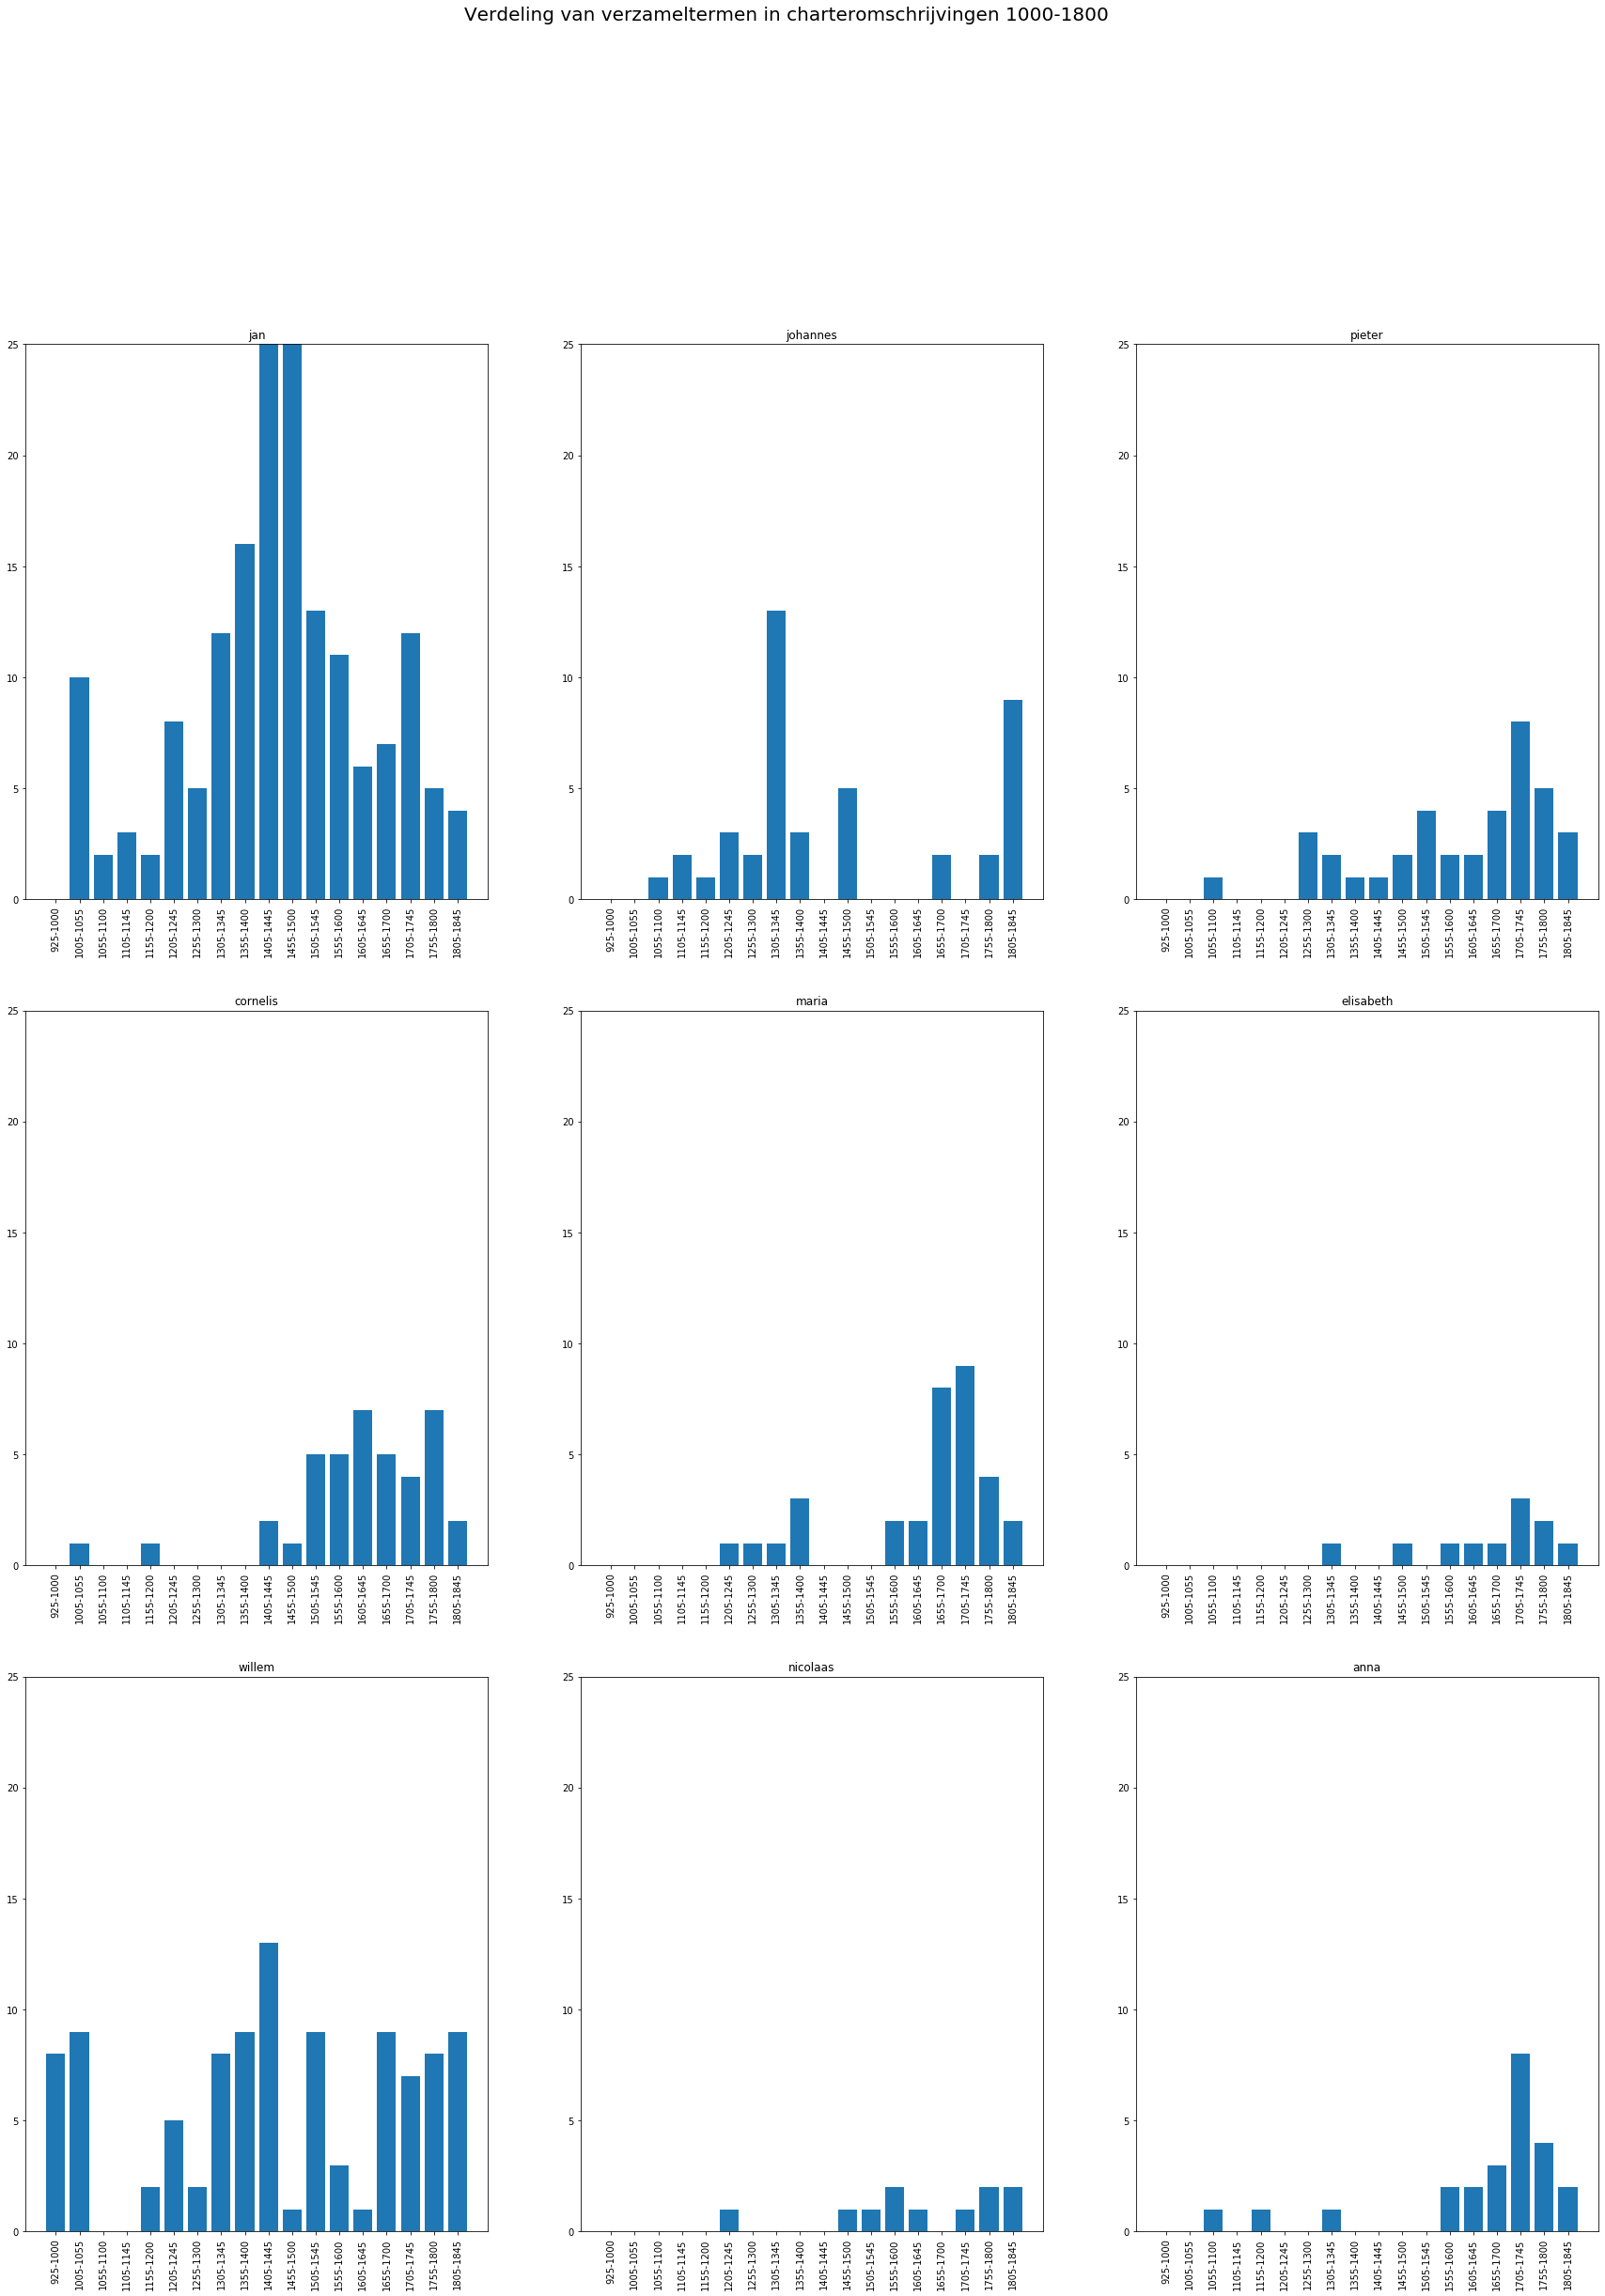

In [882]:
termen = ['jan', 'johannes', 'pieter', 'cornelis', 'maria', 'elisabeth', 'willem', 'nicolaas', 'anna']
fig = plt.figure(figsize=(30,50))
fig.suptitle("Verdeling van verzameltermen in charteromschrijvingen 1000-1800",fontsize=20)

for t in enumerate(termen):
    term = t[1]
    s = overzicht.query("term == '{}'".format(term))
    ax = fig.add_subplot(len(termen)/3+1,3,t[0]+1)
    summed = s.sum(axis=0)[1:-2]
    ax.bar(s.columns[1:-2], summed)
    ax.set_ylim(0,25)
    plt.xticks(rotation='vertical')
    ax.set_title("{}".format(term))

In [965]:
overzicht.query("term == 'doppler'")

,term,925-1000,1005-1055,1055-1100,1105-1145,1155-1200,1205-1245,1255-1300,1305-1345,1355-1400,...,1455-1500,1505-1545,1555-1600,1605-1645,1655-1700,1705-1745,1755-1800,1805-1845,total,normterm
1733,doppler,0.0,5.0,4.0,2.0,6.0,8.0,19.0,12.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,doppler
